# Analyzing Random Number Generators, Matt Bundas

In [1]:
from tests import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import time 
%matplotlib inline
csfont = {'fontname':'Verdana'}

##### In this notebook I test 4 different methods of generating random numbers. I make use of the iterative logistic and ecology maps as well as numpy's uniform random number function and my own rudimentary random number generator which generates random numbers from time calculations. I test these methods using 5 methods, 2 which involve plotting and 3 which involve summations with expected values. This project idea is from "A Survey of Computational Physics" by Landau, Paez, and Bordeianu. This project is essentially the 12.6 exploration of random numbers which uses tests discussed in Chapter 5. Below are screenshots of the exploration as well as the random number tests which I made use of.

##### The random number generators from the book are called iterative maps. When using an iterative map you have a formula which calculates the next random number based on the previous number generated. You start with a chosen initial value x0, and let the map take over from there. There is another parameter in these maps, u, which plays a very key role in the success of the generator. For example the logistic map only works as intended for u=4, where it is chaotic. Other values either do not produce any sort of sensical random numbers or numbers which are close to random but not quite. We explore the dependence of u and x0 in the logistic map and try to find the ideal values of x0 and u for the ecology map.

##### My random number generators and tests are stored in a separate file, tests.py

##### Source of project:
    Landau, Rubin H., et al. A Survey of Computational Physics: Introductory Computational Science. Princeton University Press, 2008.

![alt text](./bookscreenshots/exploration.png""Title"=1x2)

![alt text](./bookscreenshots/test2_3.png""Title"=1x2)

![alt text](./bookscreenshots/test4_6.png""Title"=1x2)

In our plot tests, tests 2 and 5, we are checking to see whether our random number generators are producing patterns. An ideal random number generator will produce numbers that fill a square evenly and whose current value does not depend on the previous value. This means our plot test 2 should show a square evenly filled with random numbers and our plot test 5 should be the same, where no patterns are noticed. When there are patterns that indicates we have a random number generator that does not perfectly generate random numbers.

In our analytic tests we are running summations of our random values which should all converge to an expected value. In test 3 we want our summations to be close to (1/(k+1)) which in our case is .2 as we use a k value of 4, in test 4 we want our summations to be close to .25, and in test 6 we just want our summations to end up within an order of magnitude of 1. If our summations are close to the expected value that indicates our random numbers are independent and uniform. These tests check randomness by looking at the deviation from this expected value. We would expect the deviation from the expected value to decrease as we increase the number of random numbers N, as more numbers should mean a more accurate result and reduce the random noise associated. As with most random processes we expect the deviation from the expected to go as (N)^(-1/2), if this is the case then we can say our numbers generated are random. We run these tests by running the summations for different values of N and seeing how the deviation from the expected value changes, graph the results and find the slope as a function of N.

## Testing Logistic

### Plot Tests

In [2]:
#define the paramaters used to test the logistic map, u=4 is chaotic, random
ulog = 4
x0log = .1


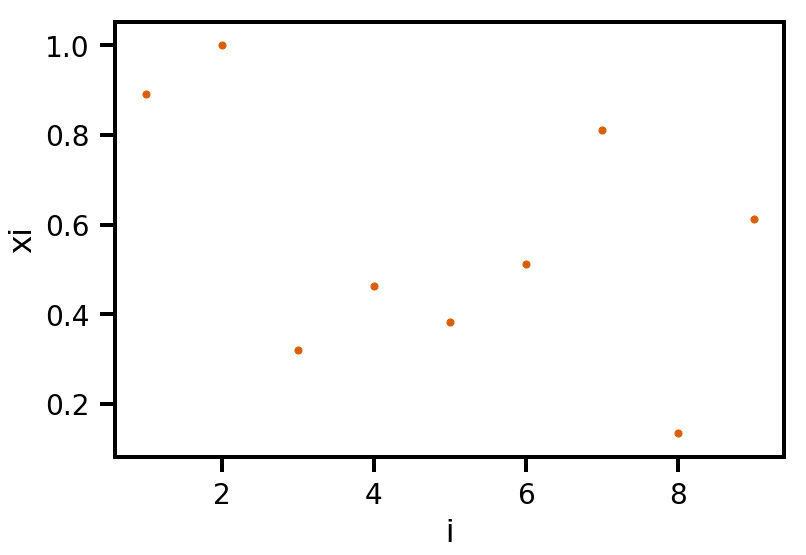

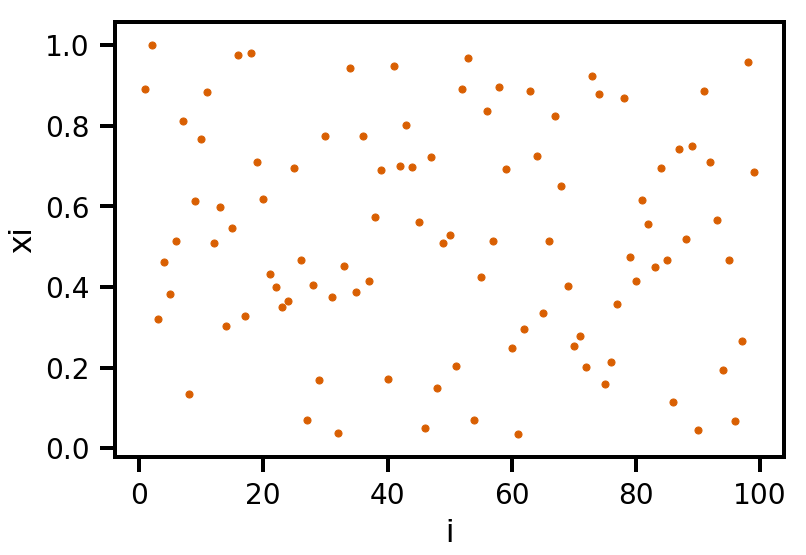

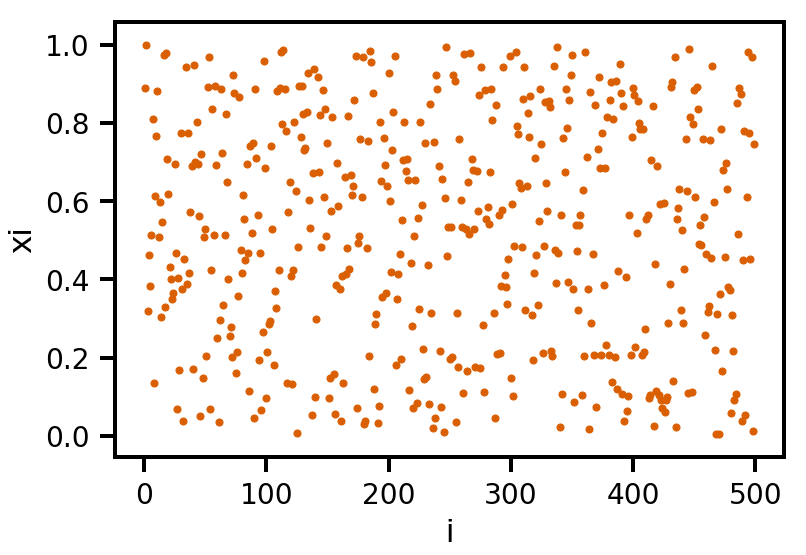

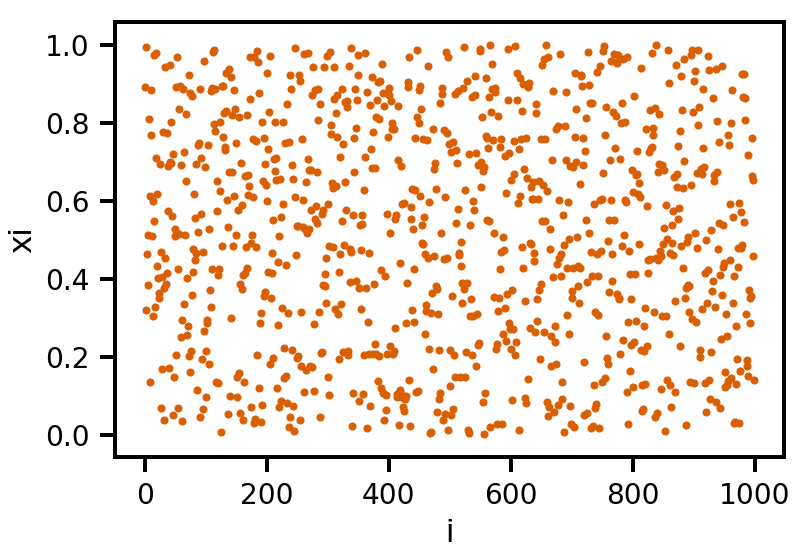

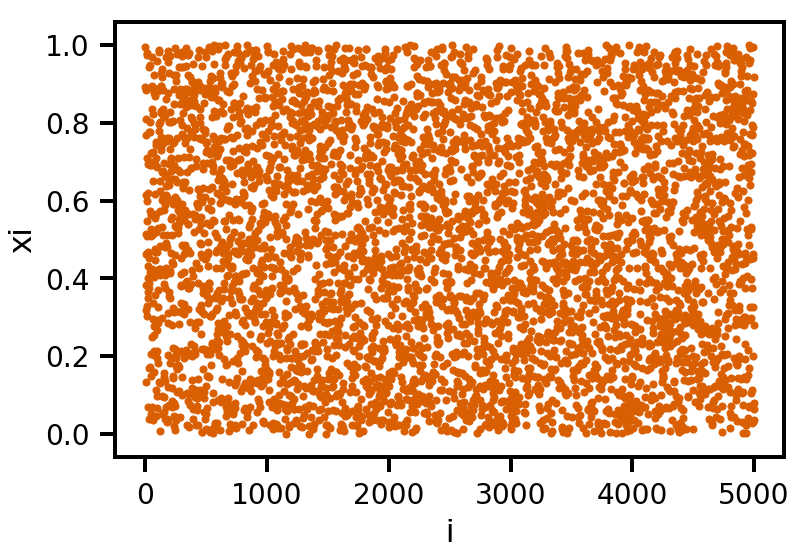

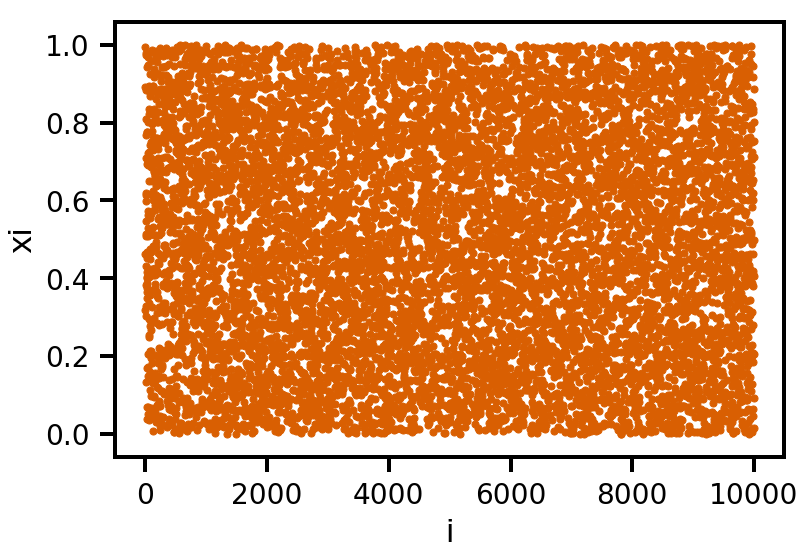

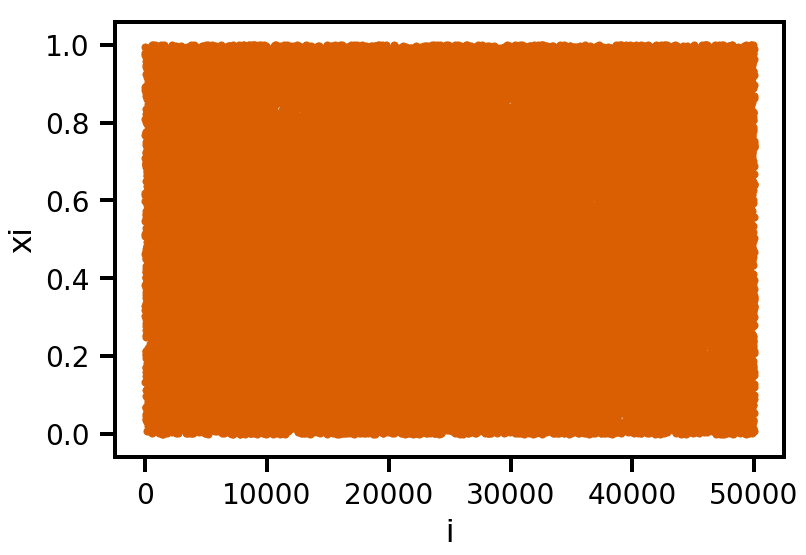

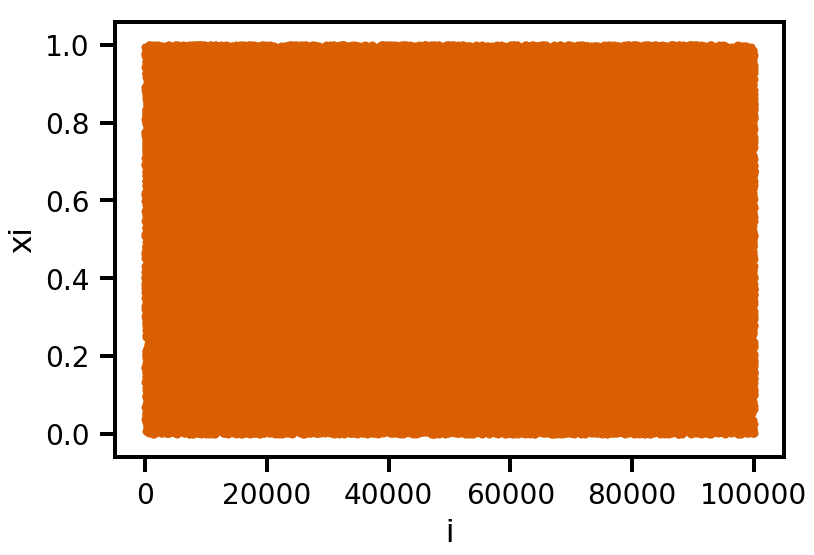

In [3]:
run_plot_test2(ulog,x0log,"logistic")

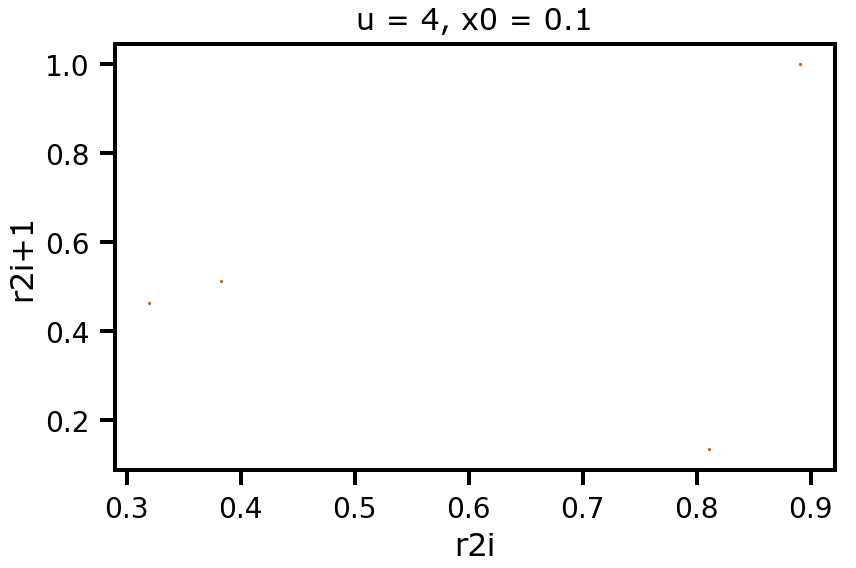

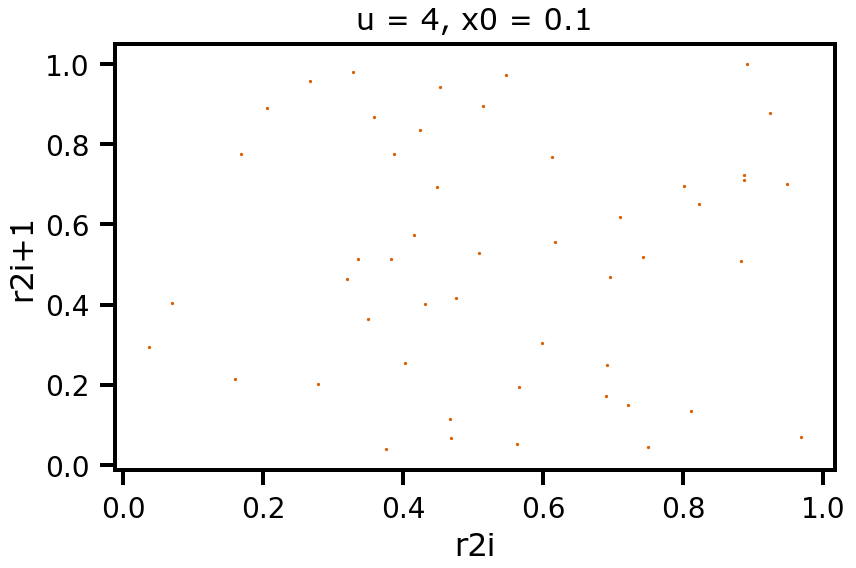

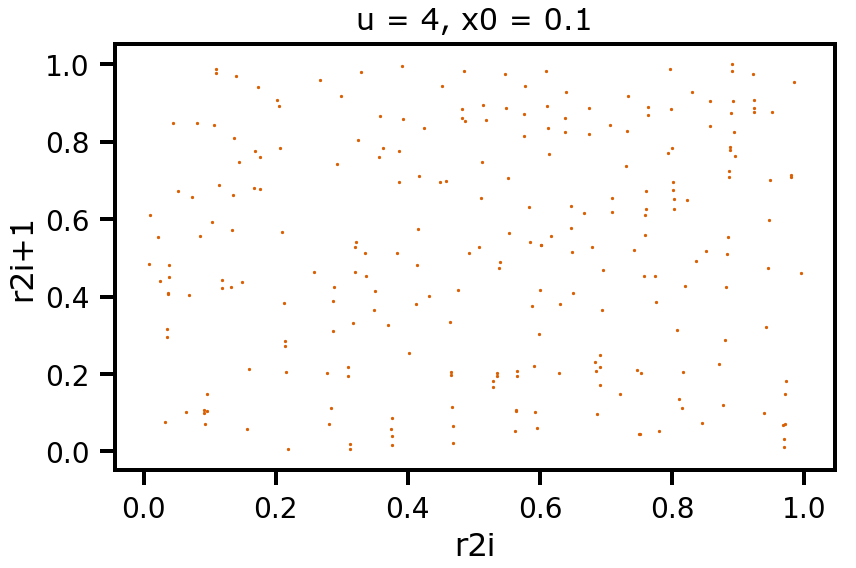

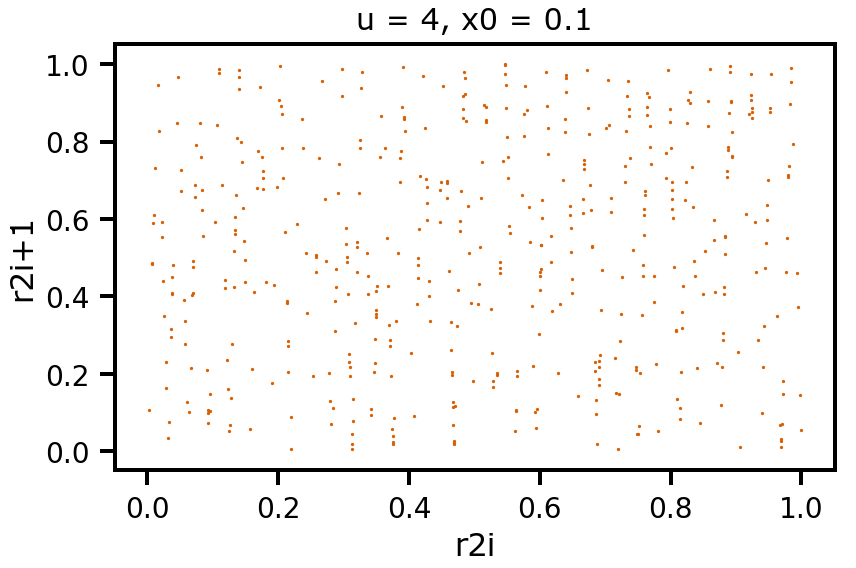

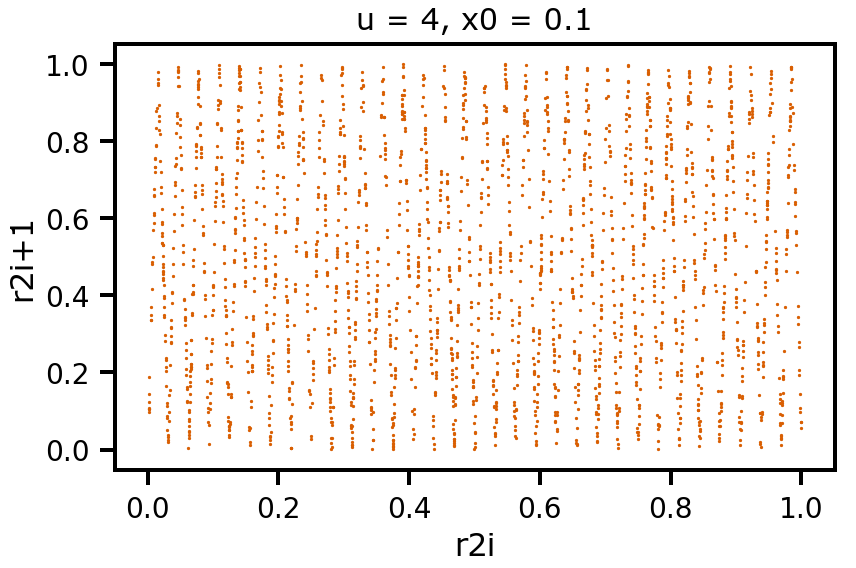

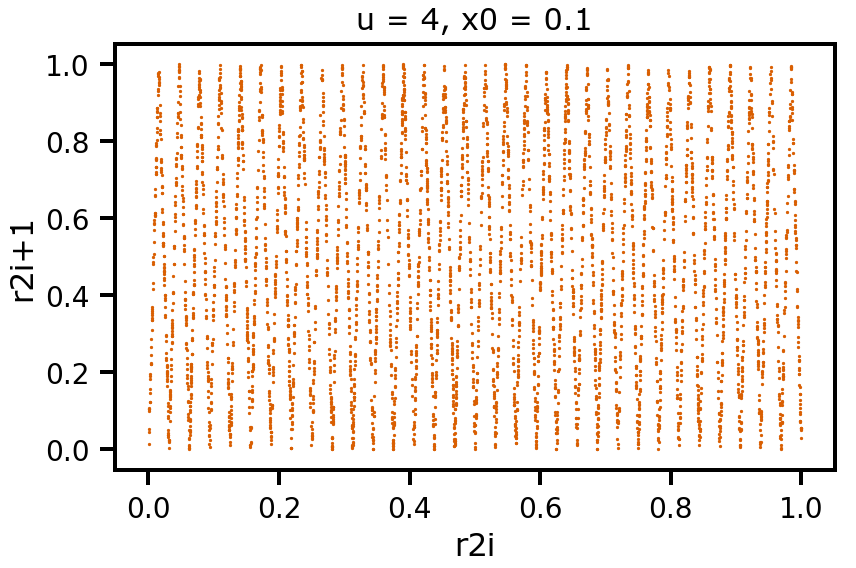

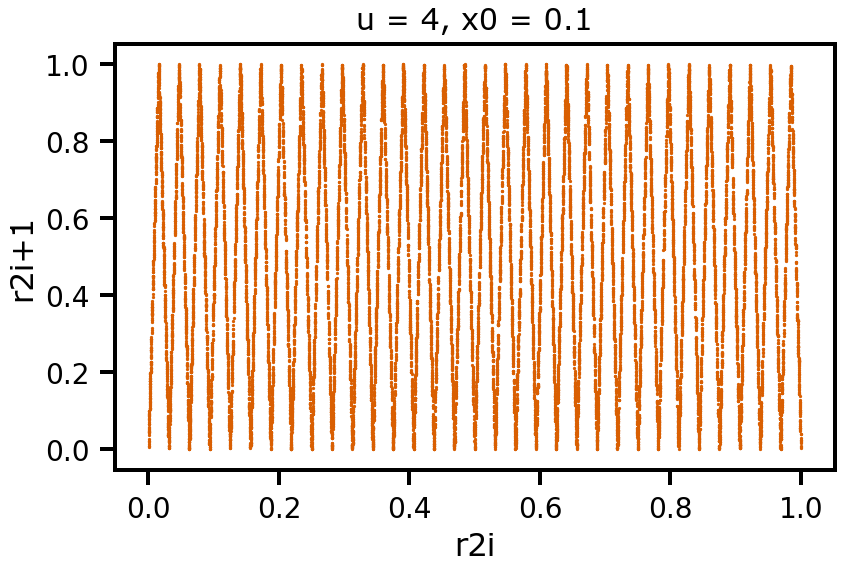

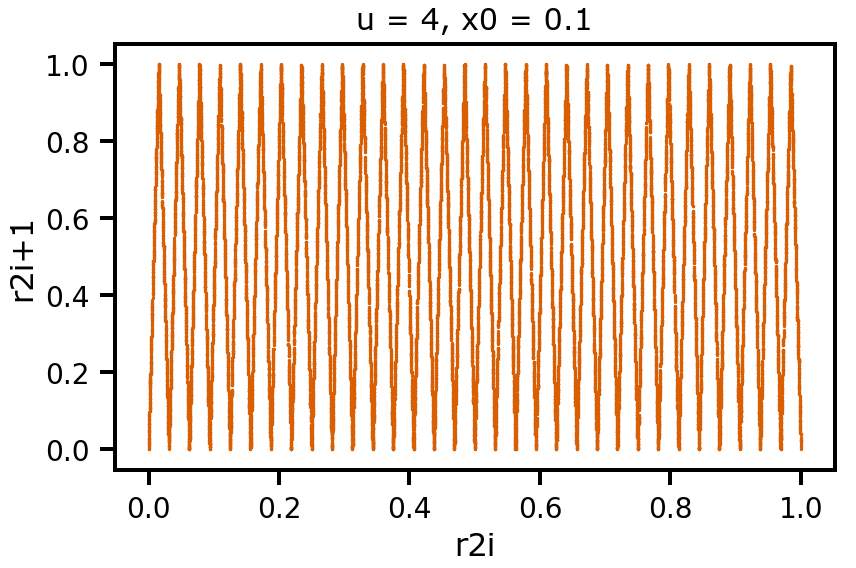

In [4]:
run_plot_test5(ulog,x0log,"logistic")

## Testing u dependence

Here I am looking at how the parameter u affects the logistic map. Only for u=4 does the map genearte properly random values, in general as we approach u=4 from smaller values the generator becomes more and more functional.

mkdir: log_utest: File exists


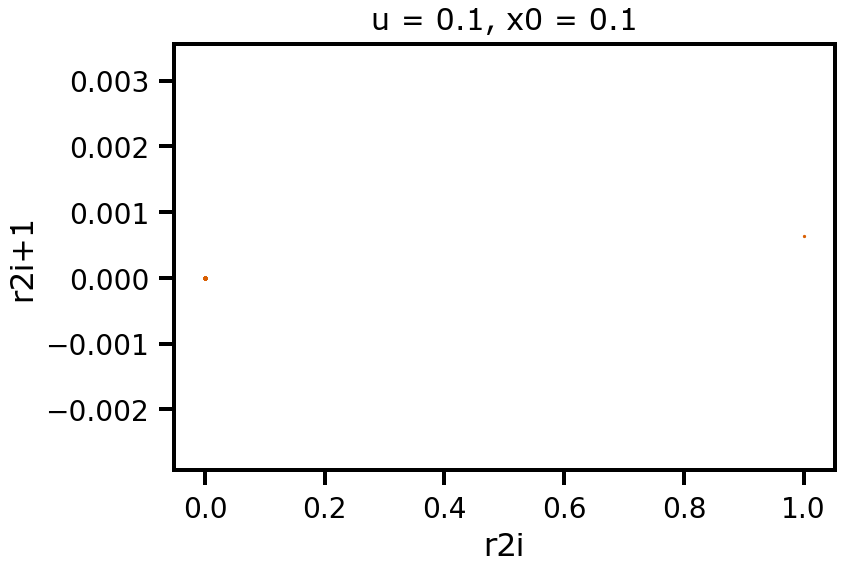

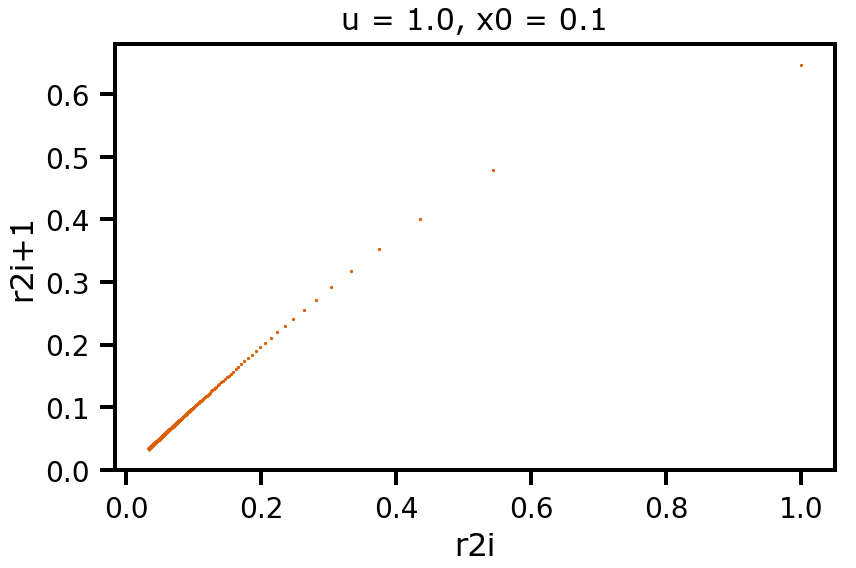

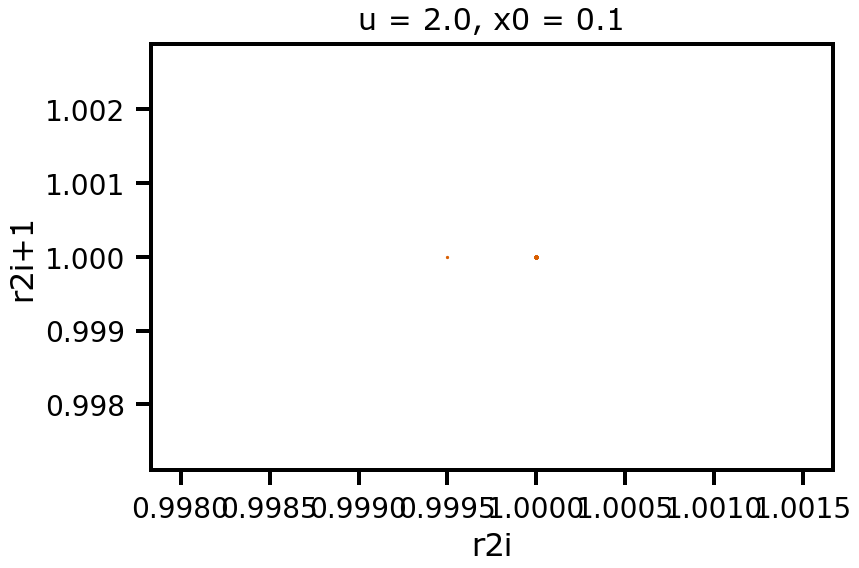

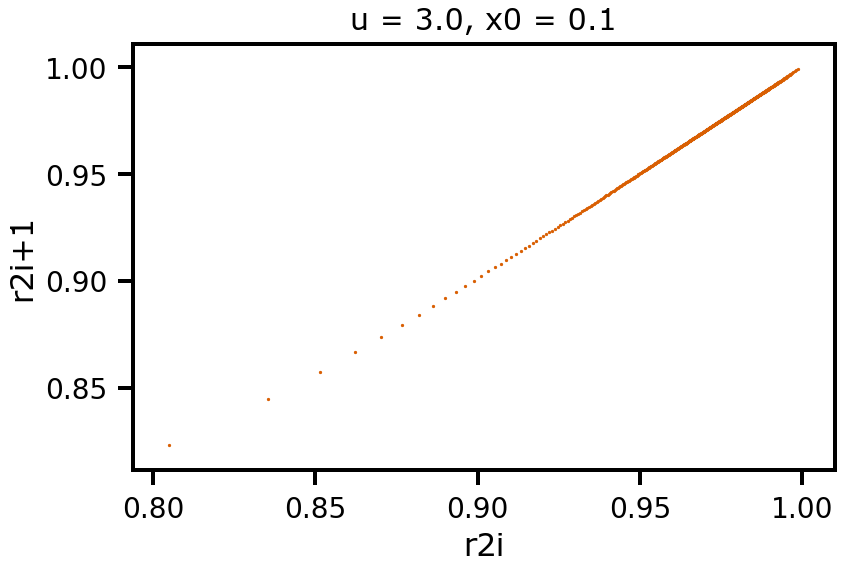

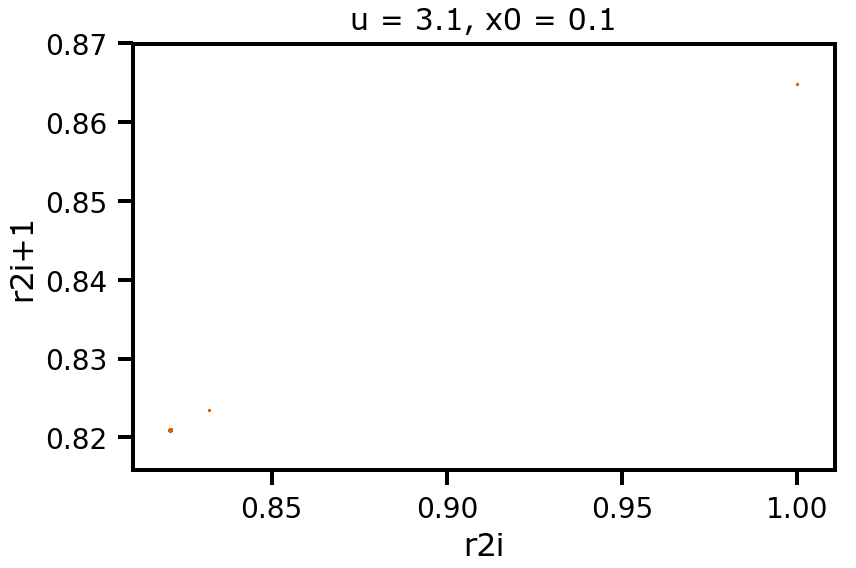

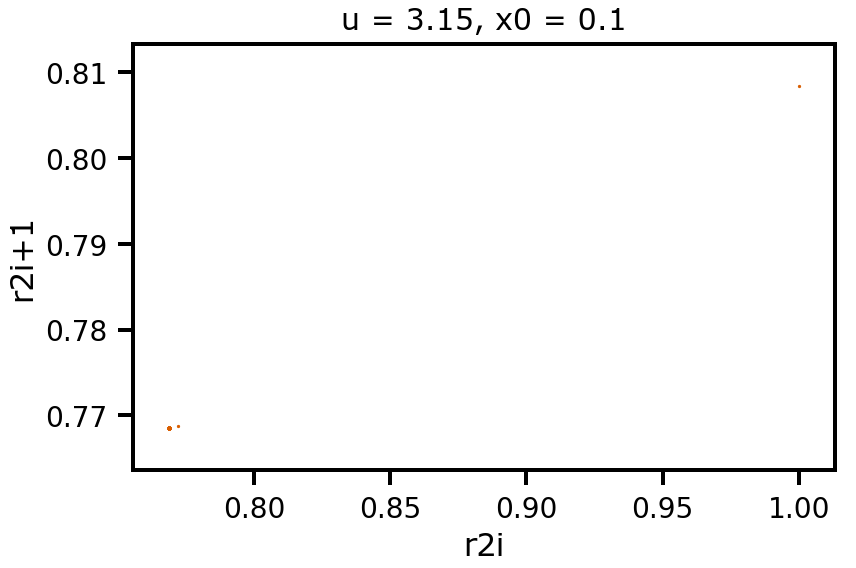

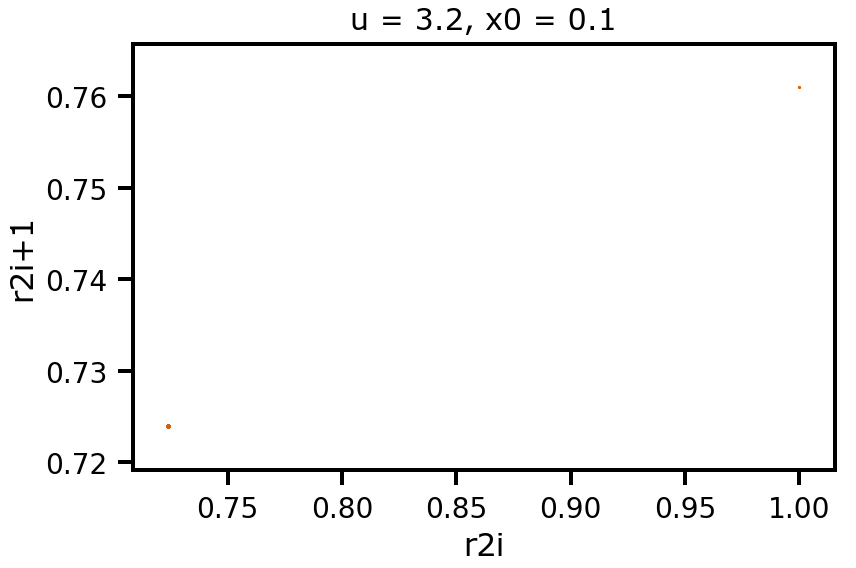

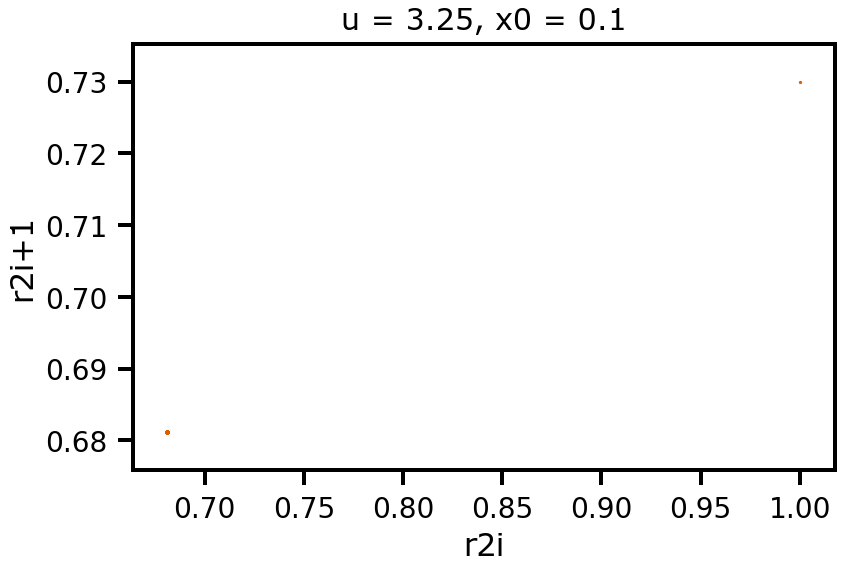

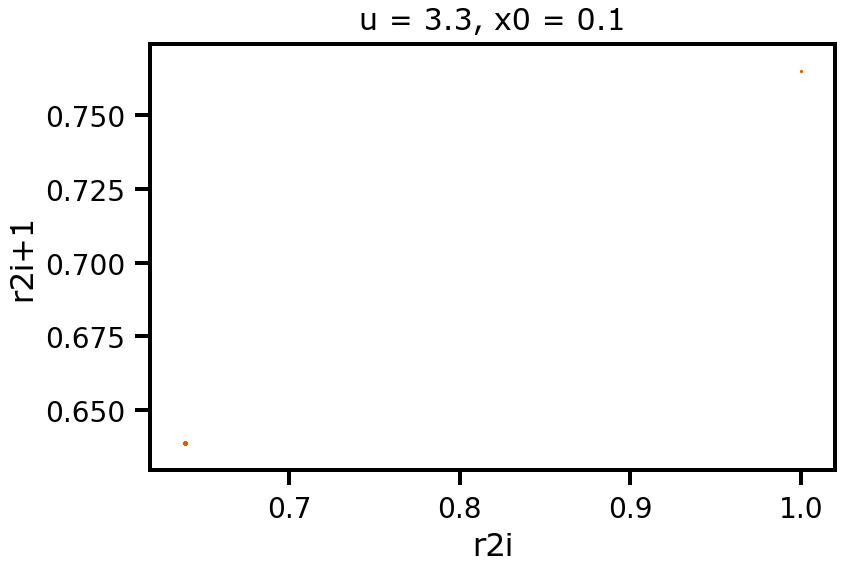

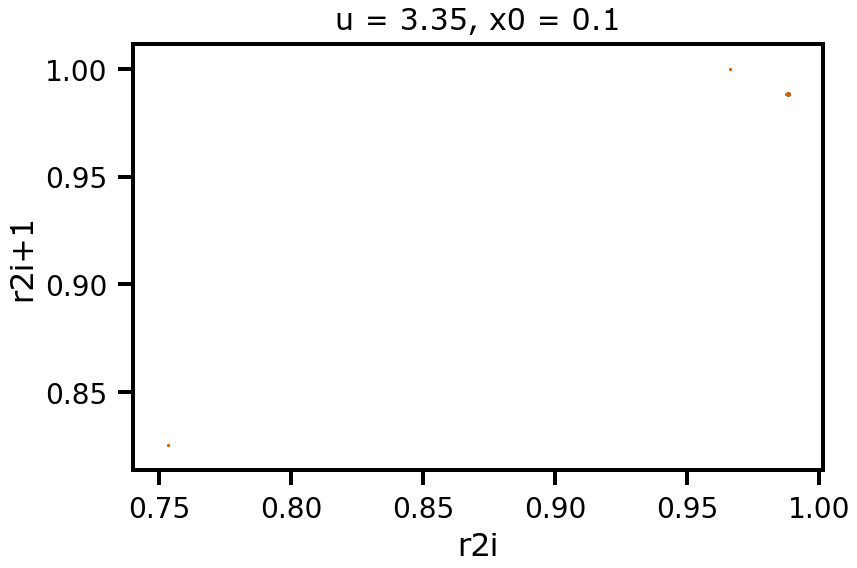

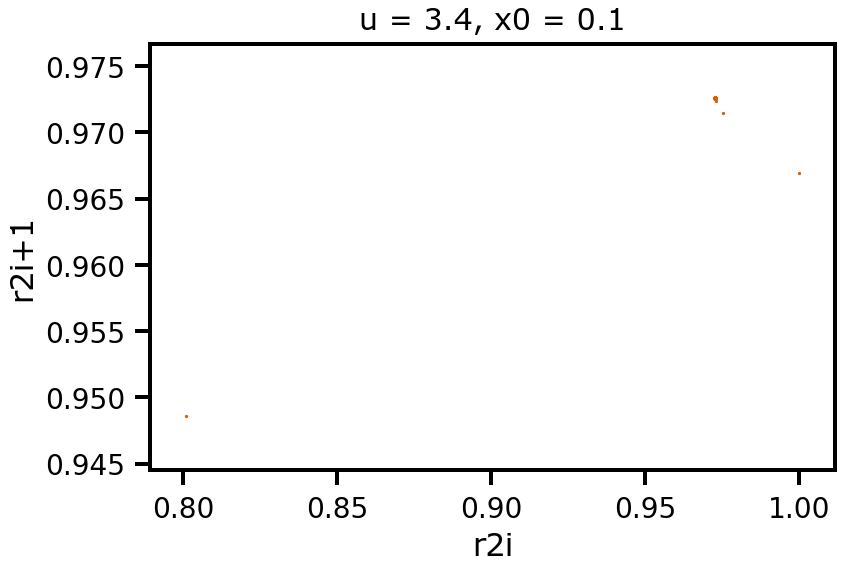

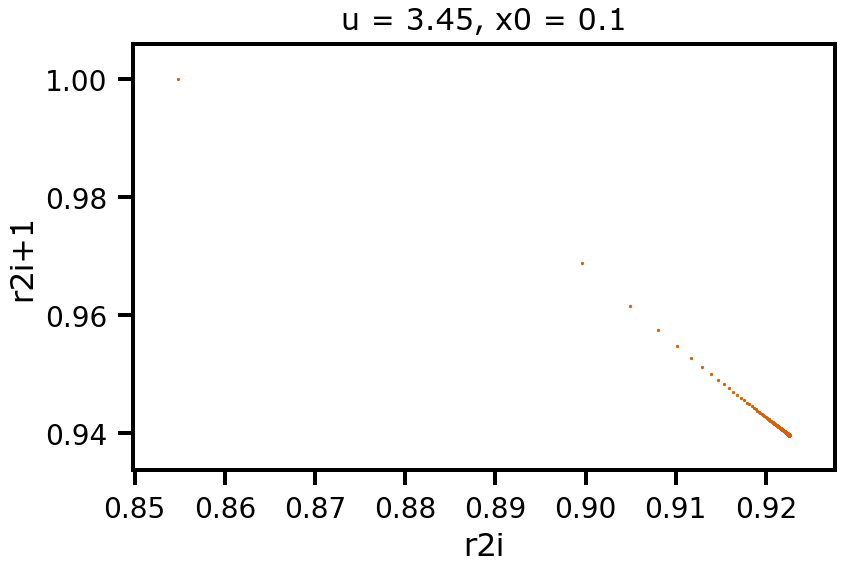

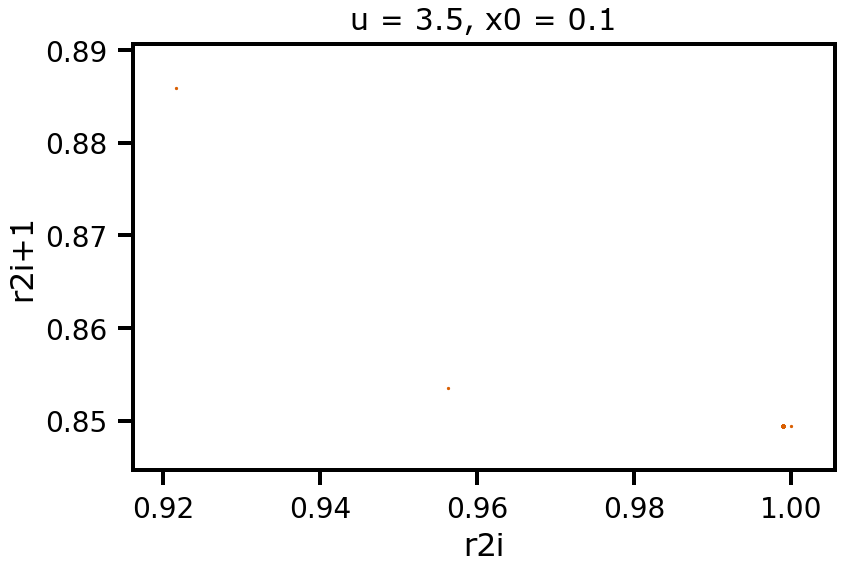

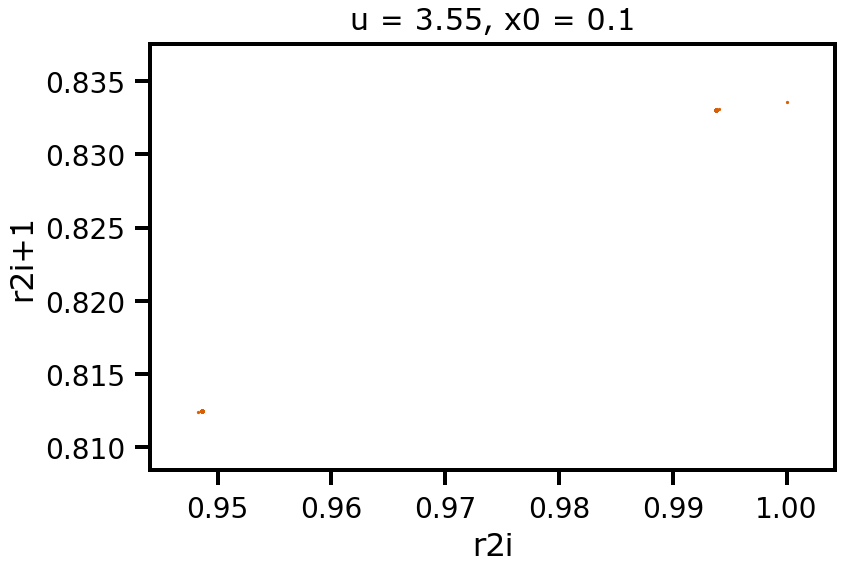

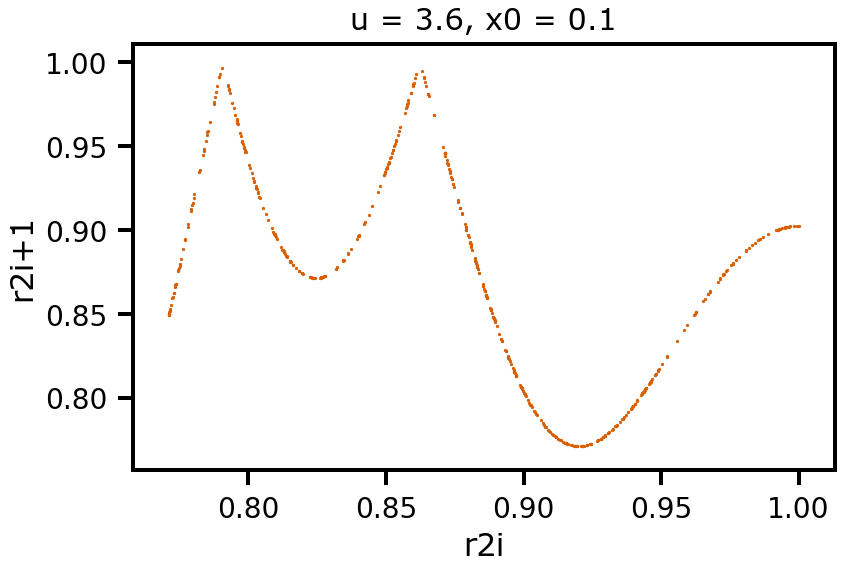

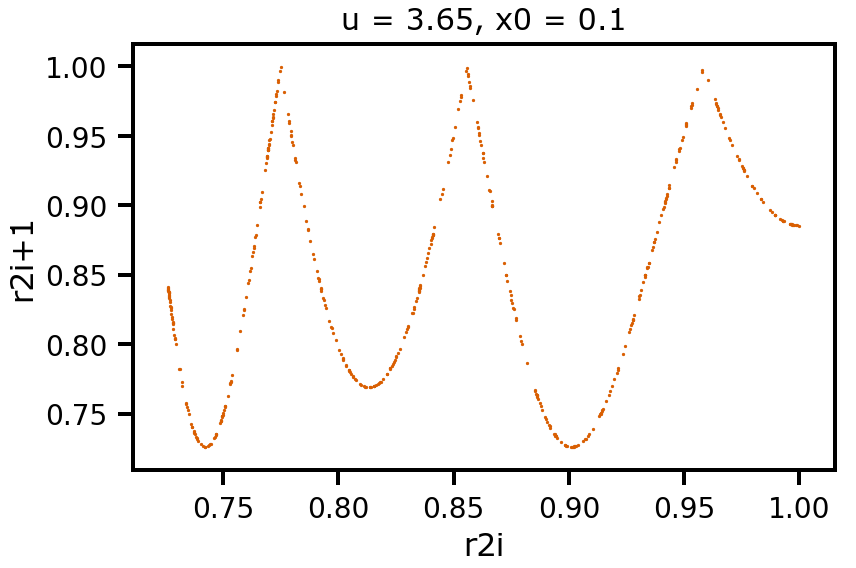

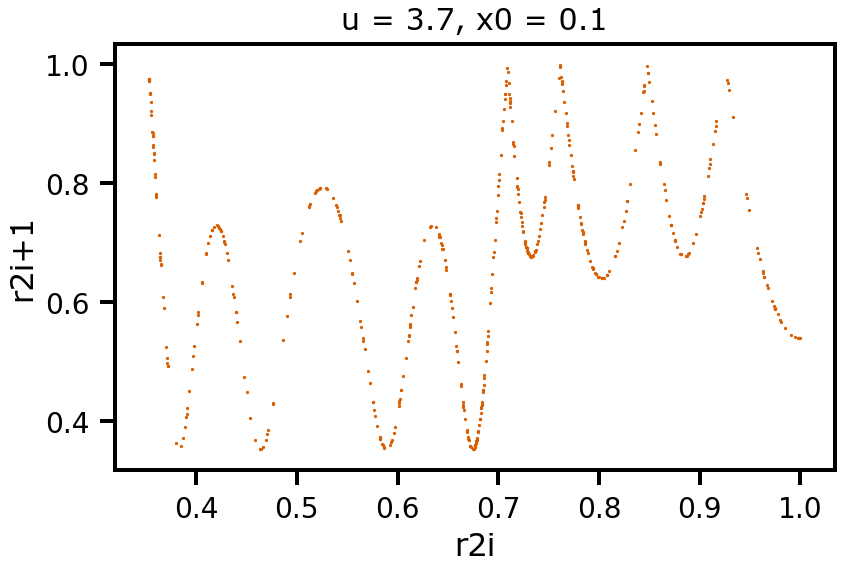

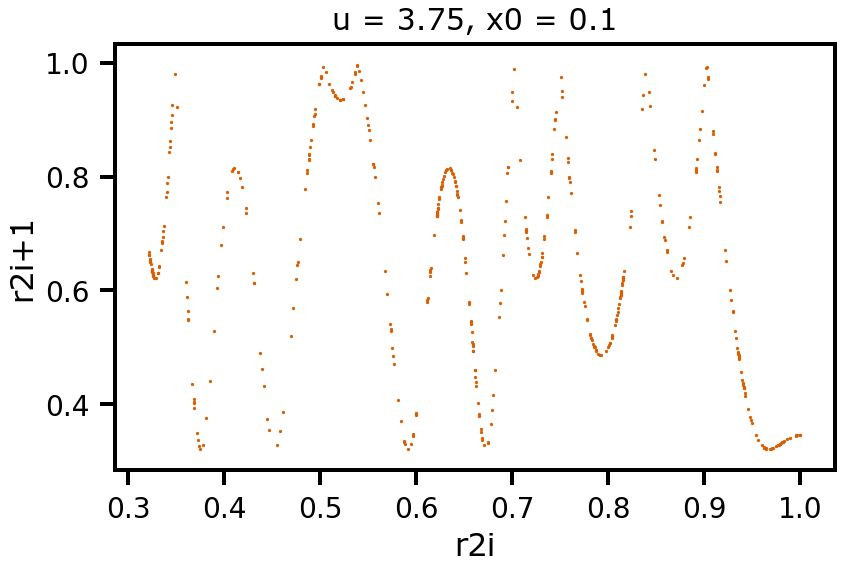

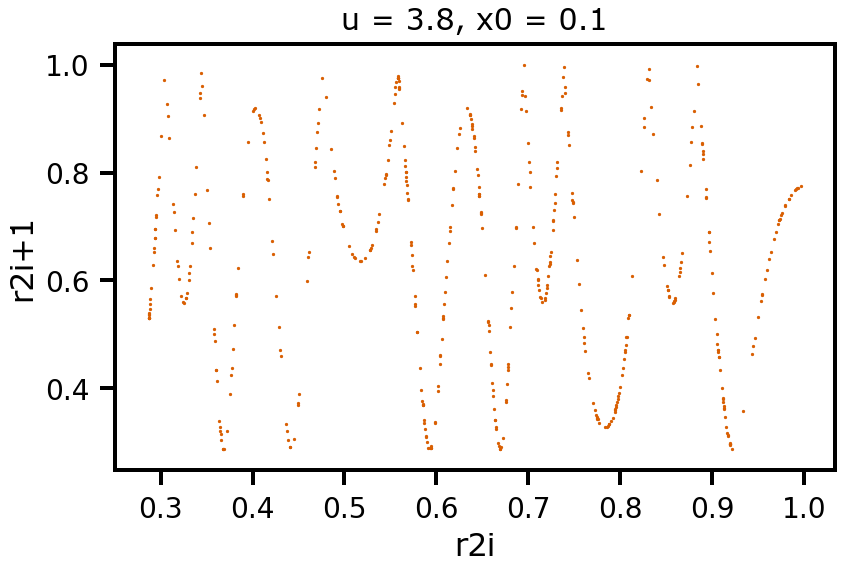

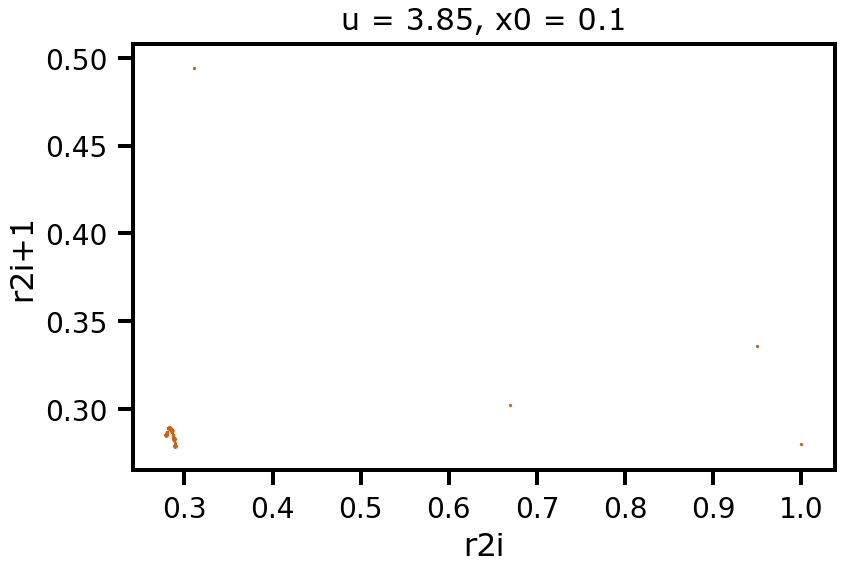

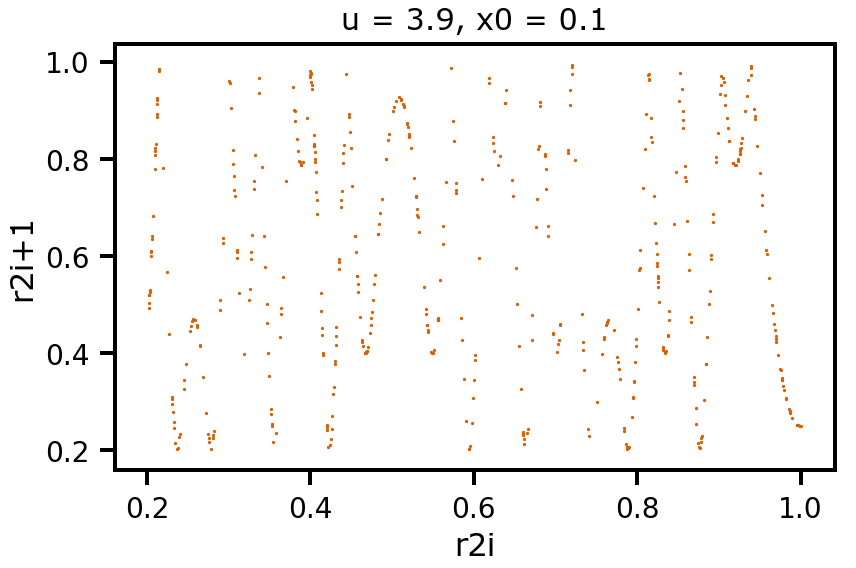

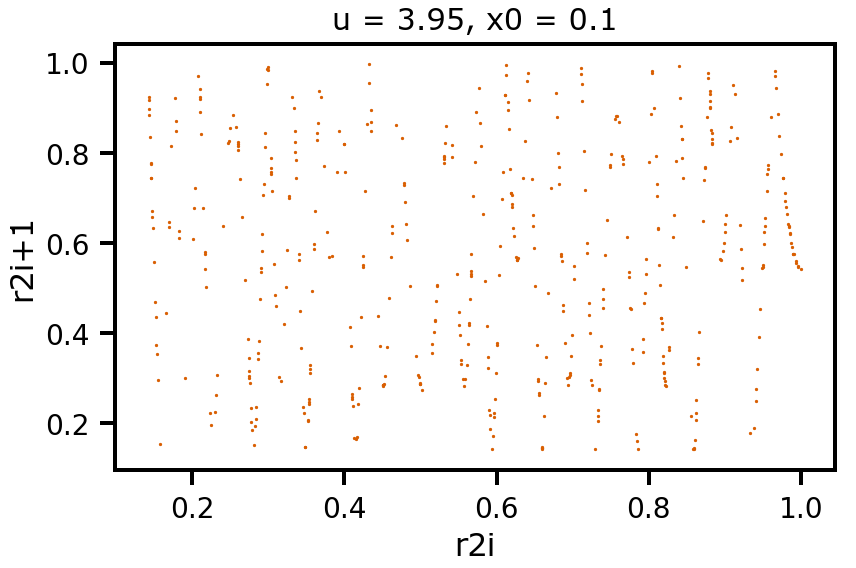

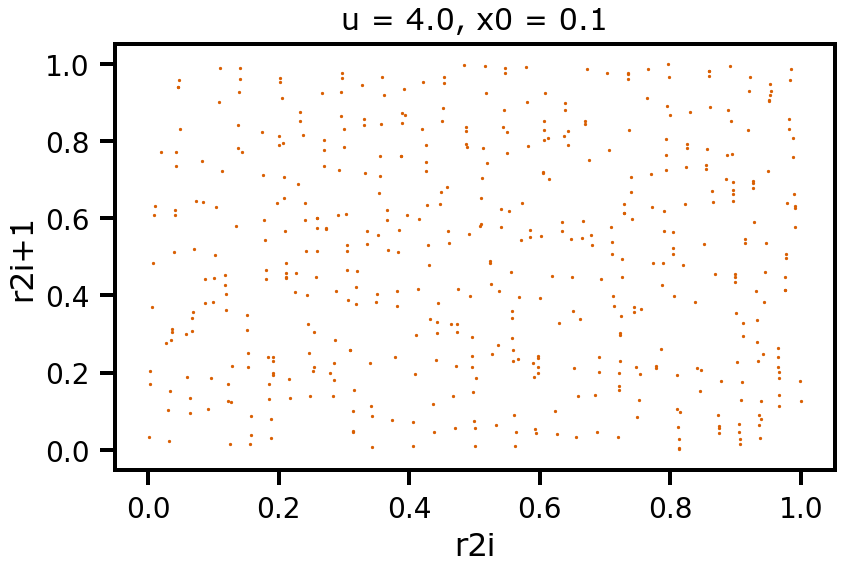

/Users/matthewbundas/Desktop/480_project/deliverables/tests.py:25: RuntimeWarning: overflow encountered in double_scalars
  num = u*x*(1-x)
/Users/matthewbundas/Desktop/480_project/deliverables/tests.py:38: RuntimeWarning: invalid value encountered in arccos
  uniform_randoms[i] = np.arccos(1-2*num)/np.pi


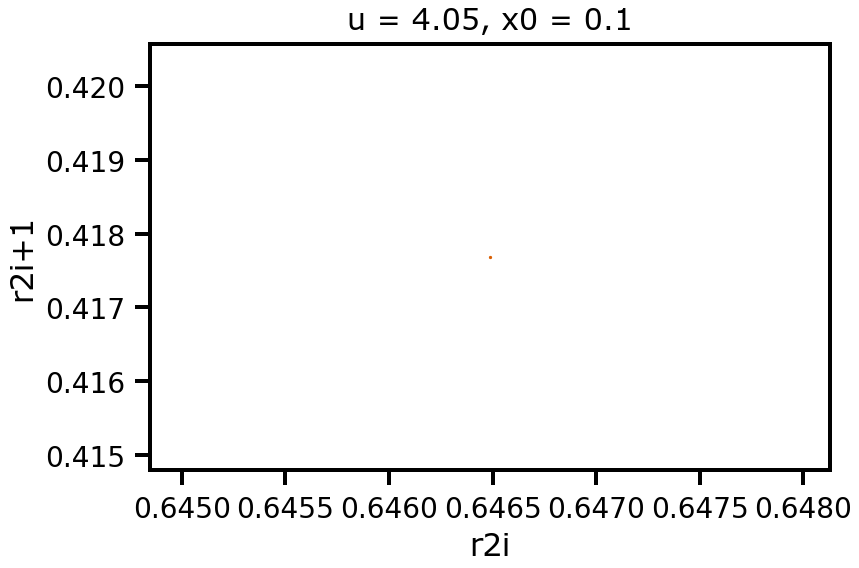

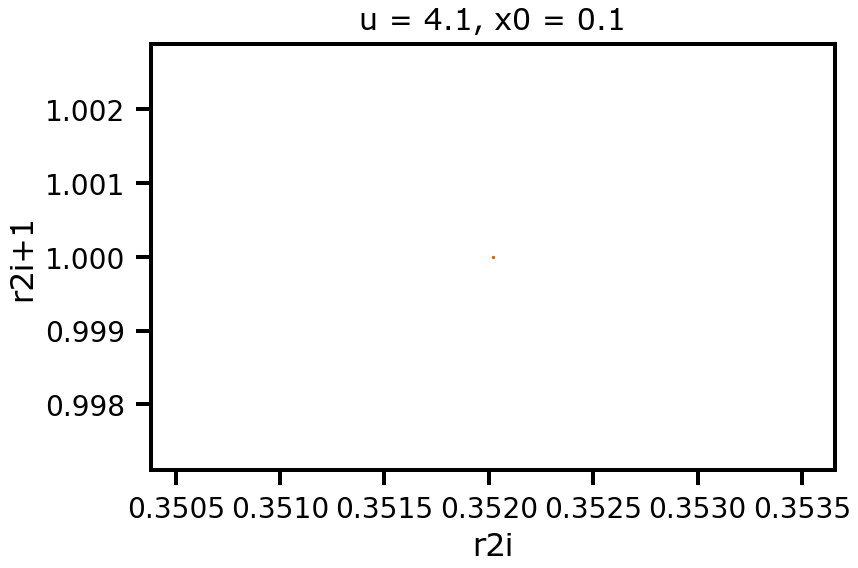

/Users/matthewbundas/Desktop/480_project/deliverables/tests.py:32: RuntimeWarning: divide by zero encountered in true_divide
  good_randoms = good_randoms/np.max(good_randoms)
/Users/matthewbundas/Desktop/480_project/deliverables/tests.py:32: RuntimeWarning: invalid value encountered in true_divide
  good_randoms = good_randoms/np.max(good_randoms)


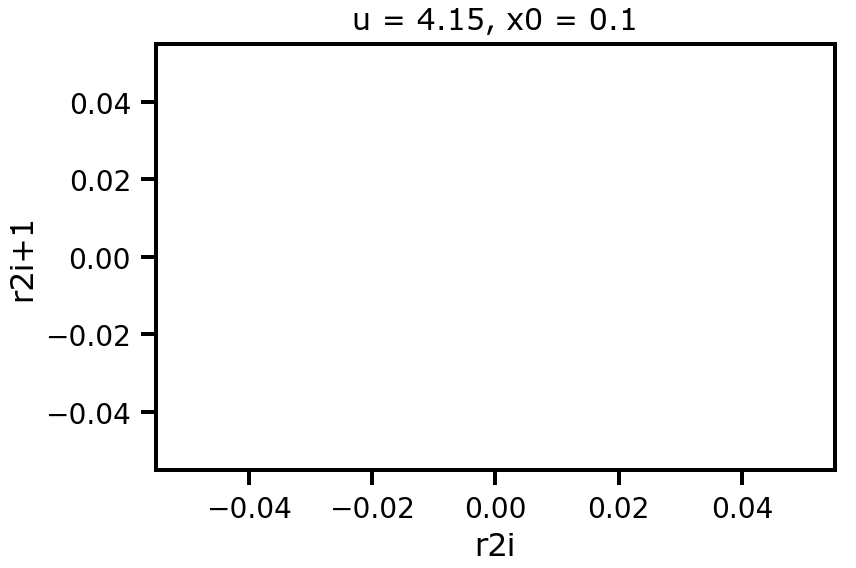

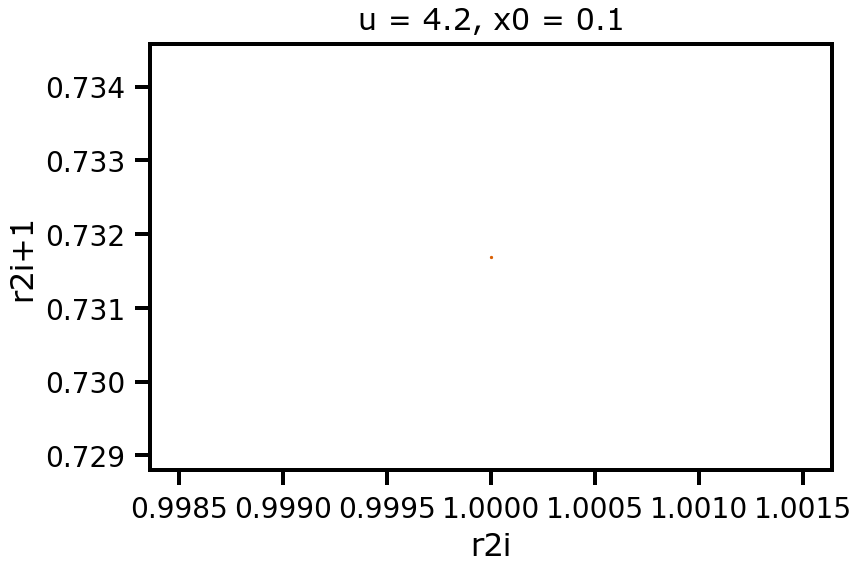

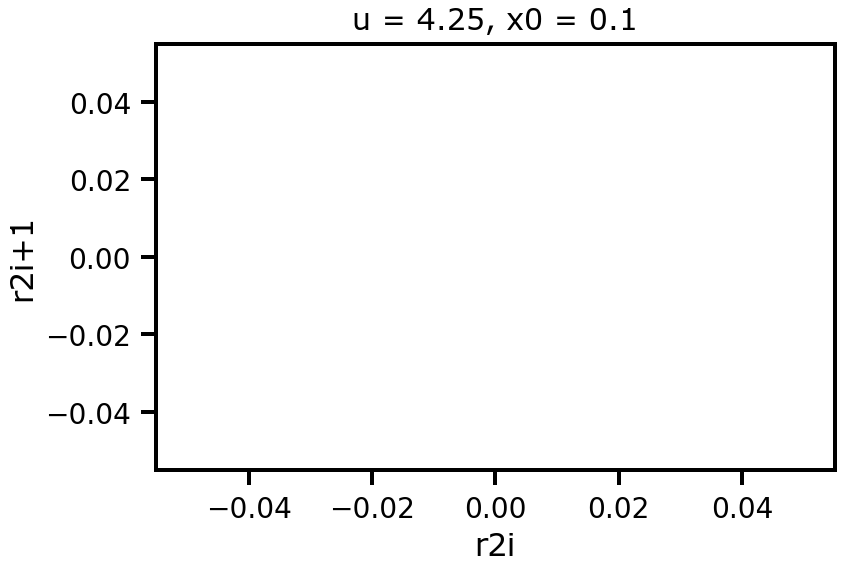

In [5]:
#make the folder to store images if it doesn't exist, if it does then clear it out
!mkdir log_utest
!rm ./log_utest/*
n = 1000

#defining the u's we want to test
firstus = np.array((.1,1,2,3))
secondus = np.arange(3.1,4.3,.05)
us = np.array(())

us = np.append(firstus,secondus)

i = 1
#loops for each u, performs plot test 5 to examine
for u in us:
    bad,good,uniform = logistic(u,n,x0log)
    savename = "./log_utest/log_utest" + str(i) + ".png"
    plot_test5(uniform,u,x0log,savename,True)
    
    #plt.close()
    i = i + 1





In [6]:
#make a movie showing how it evolves with changing u
#ffmpeg produces a very short movie so I slowed the movie down and put it in a folder called good_movies
!ffmpeg -y -i ./log_utest/log_utest%1d.png -pix_fmt yuv420p ./log_utest/log_utest.mp4
!open ./good_movies/logistic_utest.mp4

ffmpeg version 4.0.2 Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 10.0.0 (clang-1000.11.45.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.0.2_1 --enable-shared --enable-pthreads --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gpl --enable-libmp3lame --enable-libopus --enable-libsnappy --enable-libtheora --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libxvid --enable-lzma --enable-opencl --enable-videotoolbox
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    58.  3.100 / 58.  3.100
  libavfilter     7. 16.100 /  7. 16.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  1.100 /  5.  1.100
  libswresample   3.  1.100 /  3.  1.100
  libpostproc    55.  1.100 / 55.  1.100
Input #0, image2, from './log_utest/log_utest%1d.png':
  Durati

## Testing x0 dependence

Here I am looking at how the parameter x affects the logistic map where we keep u at a constant of 4. It seems like the map is not affected by changing the initial x as all of the plots do not appear to have a pattern. x0 = .5 gives null results because of the structure of the generator, and values for x0 above or equal to 1 give null results.

mkdir: log_xtest: File exists
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


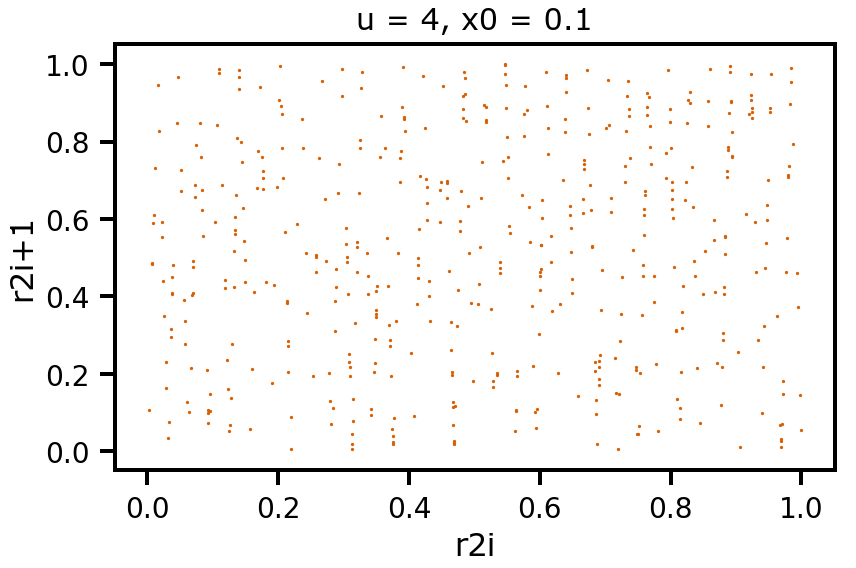

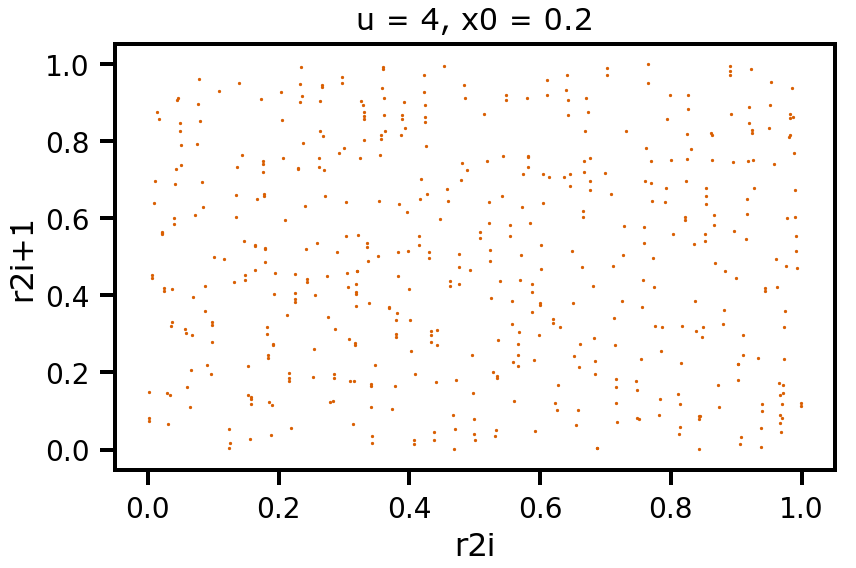

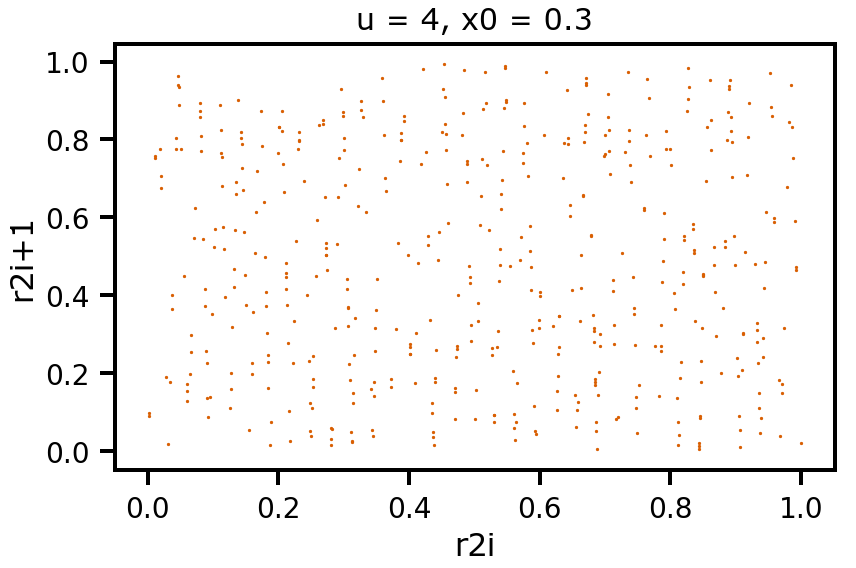

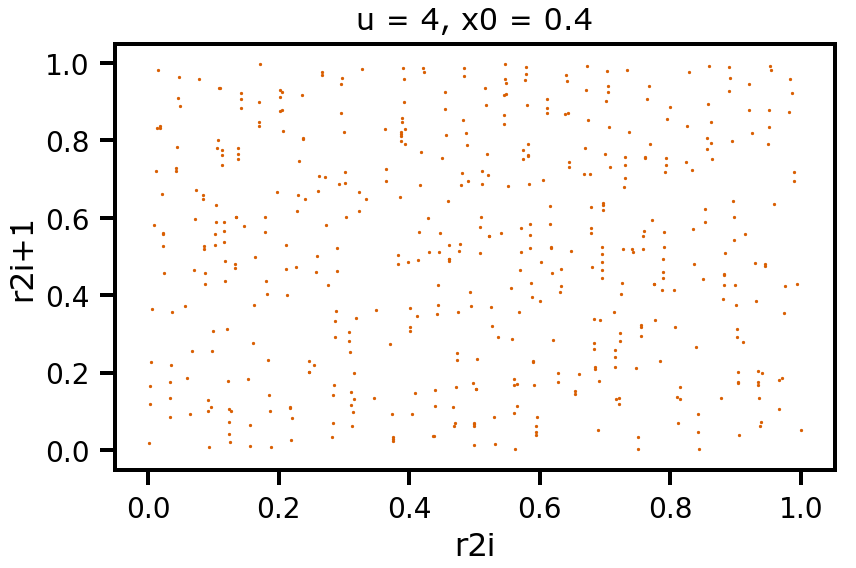

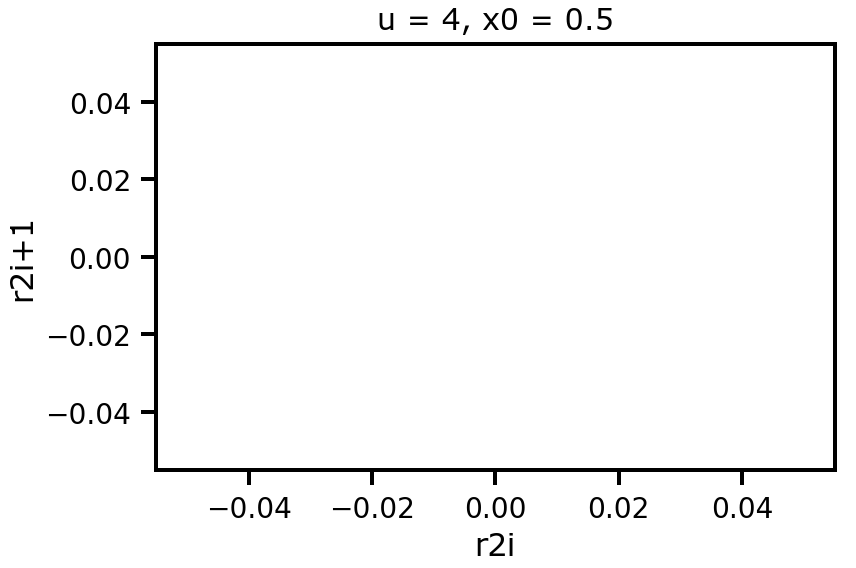

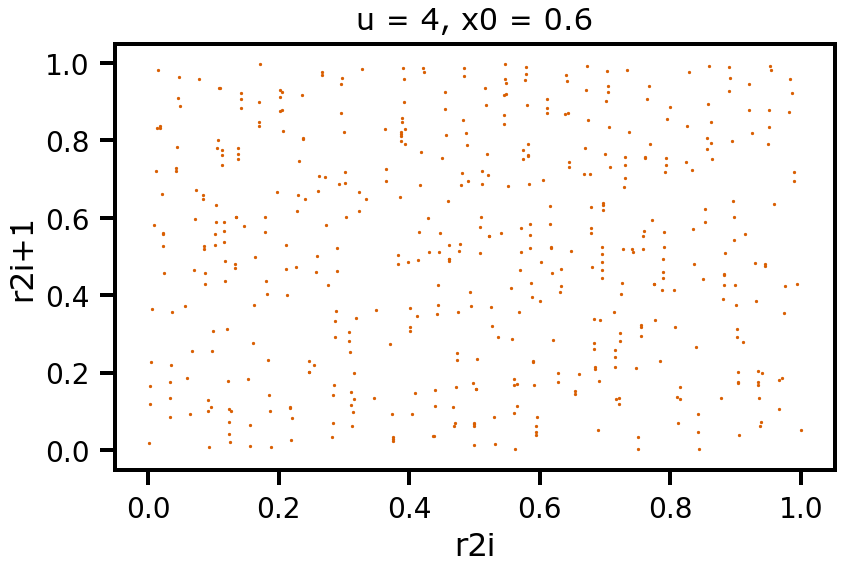

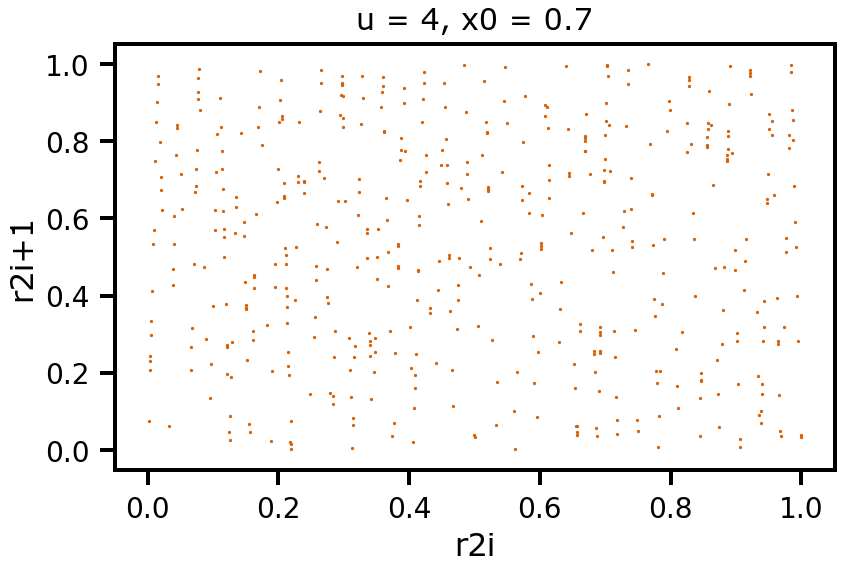

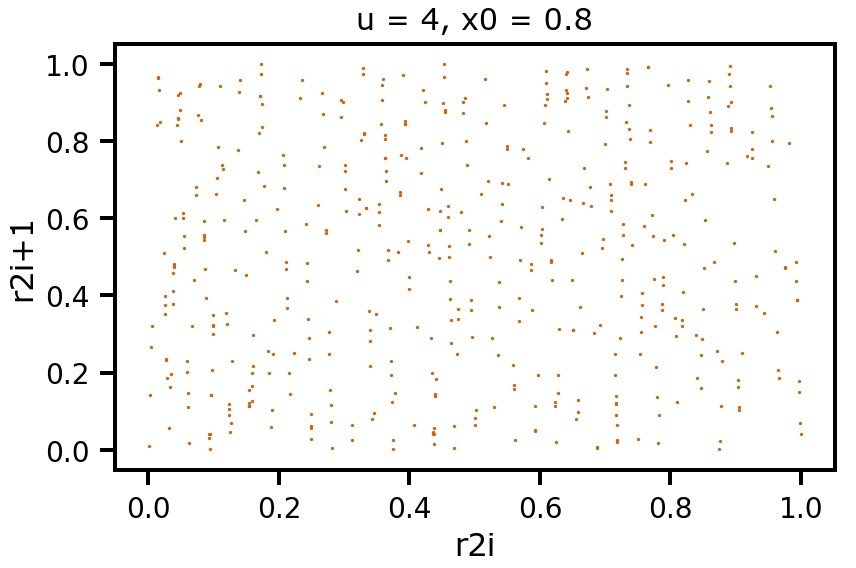

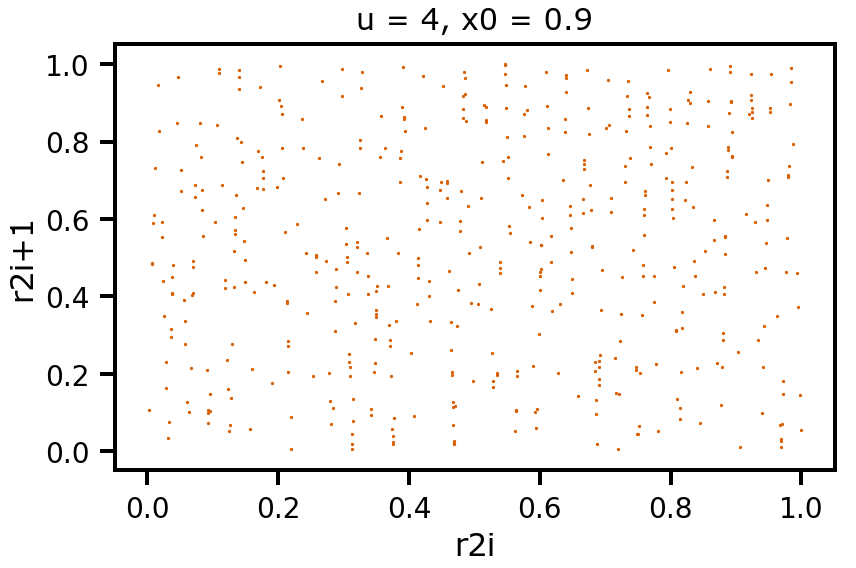

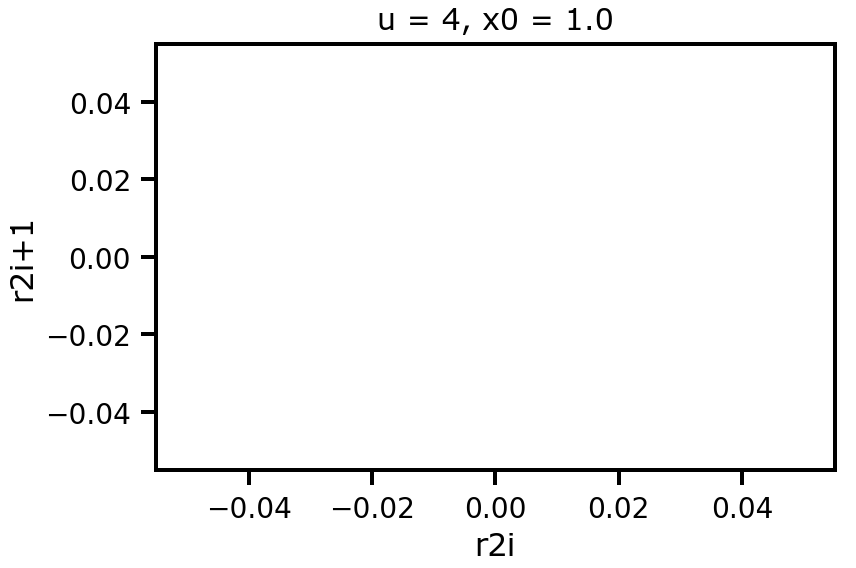

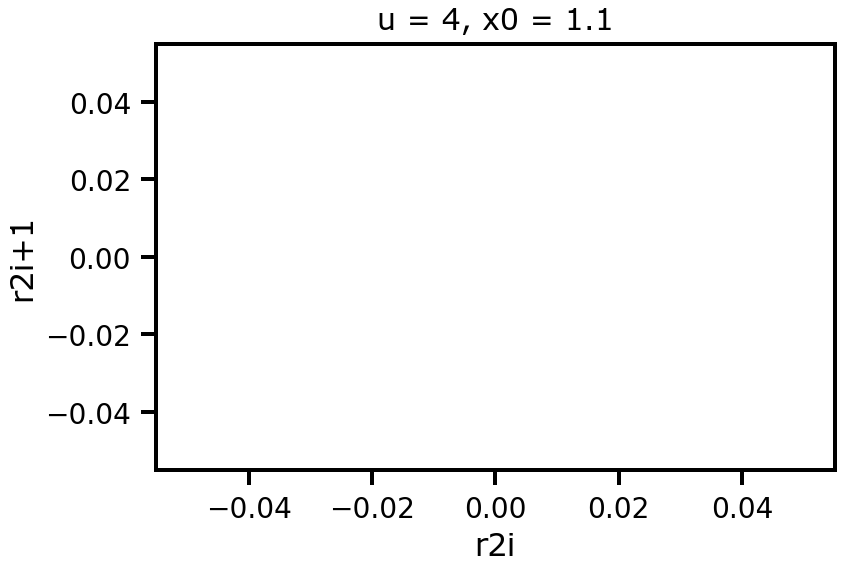

In [7]:
#make the folder to store images if it doesn't exist, if it does then clear it out

!mkdir log_xtest
!rm ./log_xtest/*

n = 1000
#define the x0s we want to test
x0s = np.arange(.1,1.2,.1)
print(x0s)

i = 1
#loops through each x0, applies plot test 5
for x in x0s:
    
    bad,good,uniform = logistic(ulog,n,x)
    savename = "./log_xtest/log_xtest" + str(i) + ".png"
    plot_test5(uniform,ulog,x,savename,True)
    
    i = i + 1



In [8]:
#create a movie to see how results change with different x0's
#ffmpeg produces a very short movie so I slowed the movie down and put it in a folder called good_movies
!ffmpeg -y -i ./log_xtest/log_xtest%1d.png -pix_fmt yuv420p ./log_xtest/log_xtest.mp4
!open ./good_movies/logistic_xtest.mp4

ffmpeg version 4.0.2 Copyright (c) 2000-2018 the FFmpeg developers
  built with Apple LLVM version 10.0.0 (clang-1000.11.45.2)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.0.2_1 --enable-shared --enable-pthreads --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gpl --enable-libmp3lame --enable-libopus --enable-libsnappy --enable-libtheora --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libxvid --enable-lzma --enable-opencl --enable-videotoolbox
  libavutil      56. 14.100 / 56. 14.100
  libavcodec     58. 18.100 / 58. 18.100
  libavformat    58. 12.100 / 58. 12.100
  libavdevice    58.  3.100 / 58.  3.100
  libavfilter     7. 16.100 /  7. 16.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  1.100 /  5.  1.100
  libswresample   3.  1.100 /  3.  1.100
  libpostproc    55.  1.100 / 55.  1.100
Input #0, image2, from './log_xtest/log_xtest%1d.png':
  Durati

### Test 3

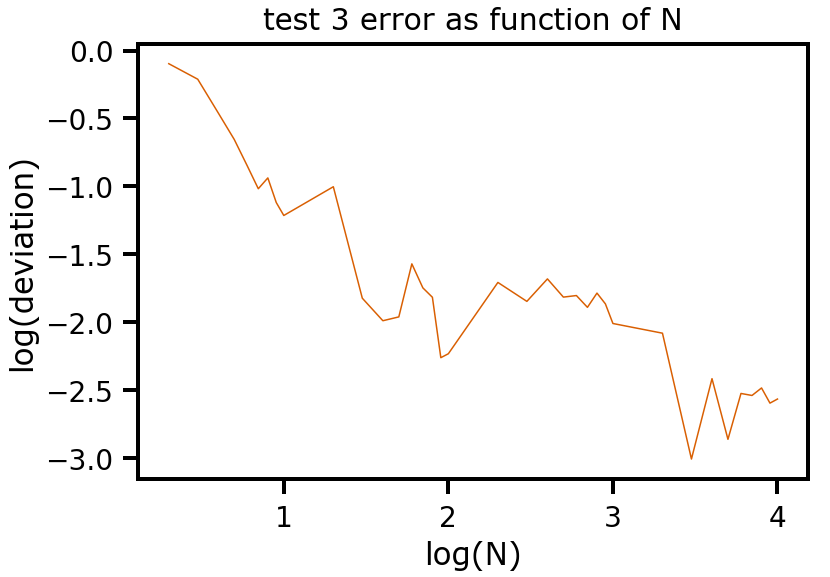

These should be close to  0.2
[1.         0.81486354 0.54672633 0.42151173 0.34151399 0.29610946
 0.31544357 0.27605413 0.26107436 0.29940029 0.21503306 0.21026102
 0.21094979 0.22690355 0.2179091  0.21526986 0.20548527 0.20586485
 0.21963495 0.21424473 0.2208468  0.21531335 0.21572362 0.21287786
 0.21638853 0.21365543 0.20979009 0.20830801 0.20098465 0.19615641
 0.19862477 0.19700817 0.19710843 0.19671612 0.19746018 0.19727801]
this slope should be close to -.5 it is equal to  -0.5612070193500845


In [9]:
do_test3(ulog,x0log,"logistic",10000)

### Test 4

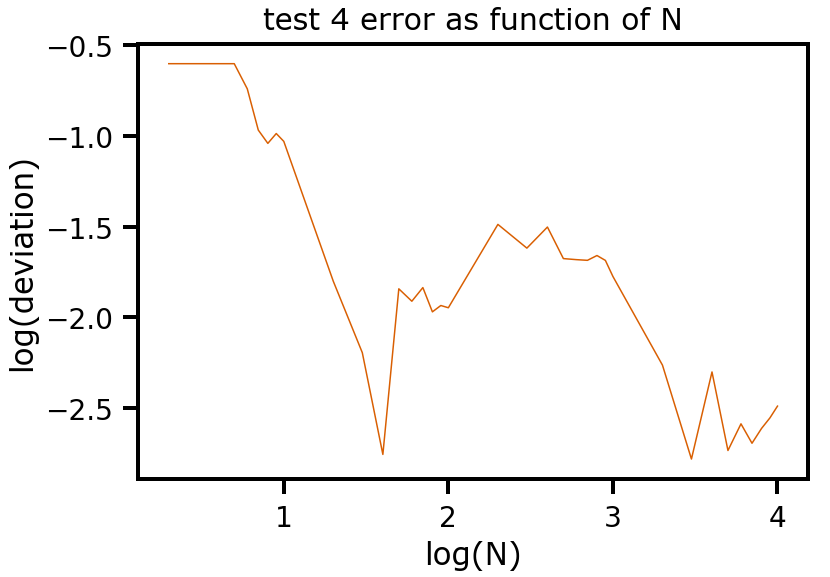

These should be close to  0.25
[0.         0.         0.         0.         0.06824076 0.14231444
 0.15900353 0.14691339 0.15667942 0.26580985 0.25639778 0.25175999
 0.26437859 0.26228593 0.26460805 0.26073755 0.26163687 0.26131055
 0.28255644 0.27409651 0.28148105 0.27110073 0.27081886 0.27063903
 0.27193446 0.27061815 0.26681846 0.25546255 0.24833998 0.24499063
 0.24815022 0.2474059  0.24797219 0.24755237 0.24720122 0.24675193]
this slope should be close to -.5 it is equal to  -0.48152162015272526


In [10]:
do_test4(ulog,x0log,"logistic",10000)

## Test 6

In [11]:
do_test6(ulog,x0log,"logistic")

0.21460413566690928  k =  1 N =  100
0.06967214350973194  k =  3 N =  100
0.012597753535669165  k =  7 N =  100
0.4622960739716882  k =  1 N =  1000
0.36116644343840815  k =  3 N =  1000
0.20904784835872486  k =  7 N =  1000
0.3598353509602026  k =  1 N =  10000
0.29611311778507954  k =  3 N =  10000
0.2403641898667888  k =  7 N =  10000
0.6299261271025672  k =  1 N =  100000
0.6286775136971067  k =  3 N =  100000
0.5395165003810448  k =  7 N =  100000

The test passed


array([0.21460414, 0.06967214, 0.01259775, 0.46229607, 0.36116644,
       0.20904785, 0.35983535, 0.29611312, 0.24036419, 0.62992613,
       0.62867751, 0.5395165 ])

This iterative map performed very well with these tests. Plot test 2 was a success as you can see no discernible patterns and it seems to generate a cloud of random numbers. Plot test 5 is not ideal as you can see a very noticable pattern which shows that the next value in the random number sequence does somehow rely on the previous. The remaining tests, 3,4 and 6 all passed easily. For reasonable values of n the summations are very close to their expected values meaning the numbers are uniform the deviation also depends on (1/sqrt(N)), as the slopes from tests 3 and 4 are very close to -.5.

## Testing Ecology

## Finding the best u, x0

Here I tried to devise a method to calculate the optimal parameters for the ecology map with mild success. I loop through possible u and x0 values, run tests 3 and 4, calulating the dependence on N for each (the slope), and average the results from the two tests together and compare them to the slope we want, -.5. I keep the u and x0 if the slope of the current iteration is closer to -.5 if it is better than the current best slope. It takes awhile to run, if you'd like to run it uncomment out line 5. 

In [12]:
#define the u's and x0's we'd like to test
us = np.arange(0,4.1,.02)
x0s = np.arange(.1,1,.1)

#bestslope = 0

deviations = np.array(())
summs = np.array(())

deviations2 = np.array(())
summs2 = np.array(())

Ns = makeN(10000)

for u in us:
    #print(u)
    for x0 in x0s:
        #clear out arrays to test next set of parameters
        deviations = np.array(())
        summs = np.array(())
        deviations2 = np.array(())
        summs2 = np.array(())

        #test the two current parameters
        for n in Ns:
     
            #get the random numbers given the current n,u,x0
            bad, good, uniform = ecology(u,n,x0)
            
            #run tests 3 and 4
            summ, one_o_k, difference, sqrtN, N = test3(uniform,4)
            summ2, one_o_k, difference2, sqrtN, N = test4(uniform,4)
    
            deviations = np.append(deviations,difference)
            summs = np.append(summs,summ)
            
            deviations2 = np.append(deviations2,difference2)
            summs2 = np.append(summs2,summ2)
    
        #get the slopes from tests 3 and 4, average them together
        logdev = np.log(deviations)
        logn = np.log(Ns)
        
        logdev2 = np.log(deviations2)
        logn2 = np.log(Ns)
            
        slope,intercept, r, p, std_err = stats.linregress(logn,logdev)
        slope2,intercept, r, p, std_err = stats.linregress(logn2,logdev2)
    
        slope = (slope+slope2)/2
        
        #if we found a better slope store the good parameters and move on
        if (np.abs(slope+.5) < (np.abs(bestslope + .5))) and slope < 0:
            bestslope = slope
            print(bestslope)
            bestu = u
            bestx0 = x0
print(bestu,"bestu")
print(bestx0,"bestx0")
    
            


NameError: name 'bestslope' is not defined

In [13]:
#these are the values which came out of this algorithm
ueco = 3.1 #bestu
x0eco = .56 #bestx0

### Plot Tests

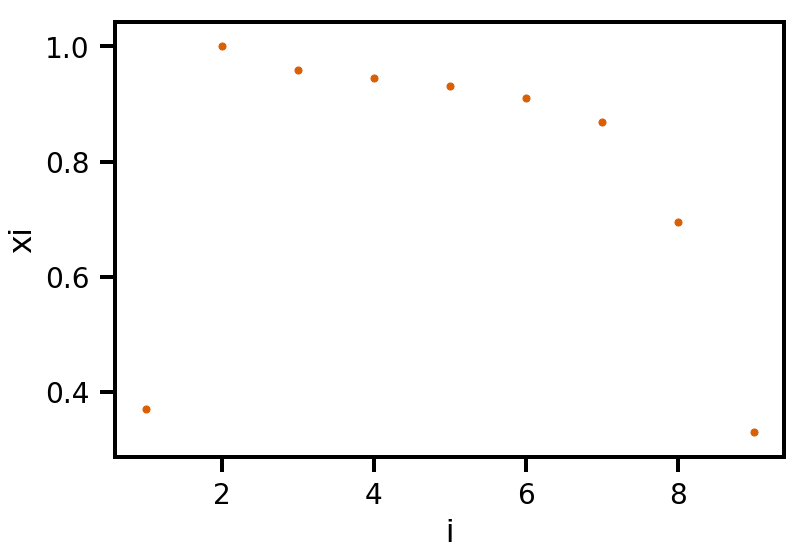

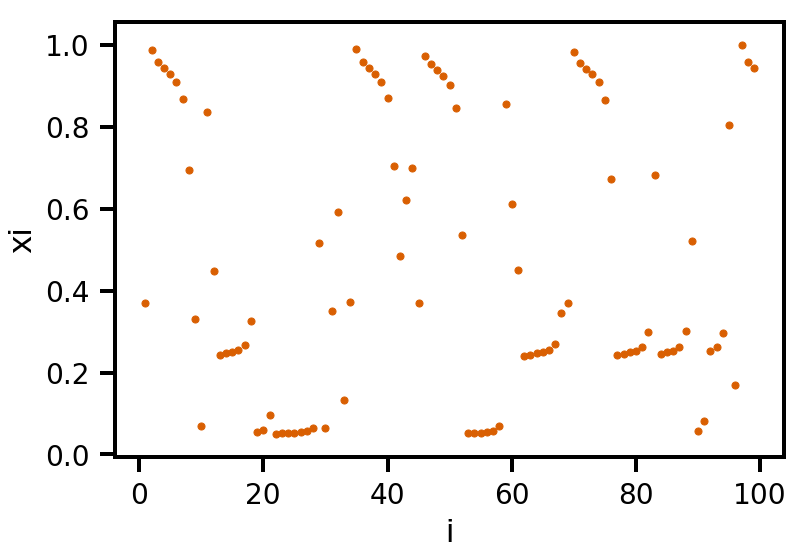

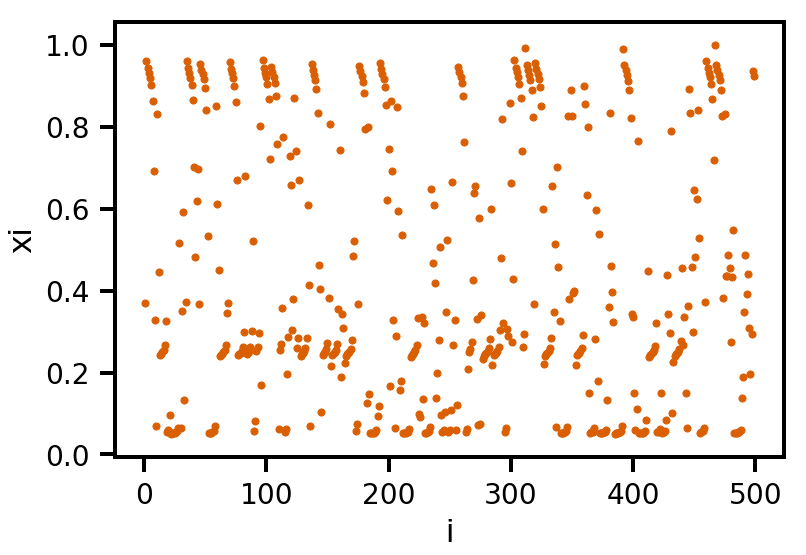

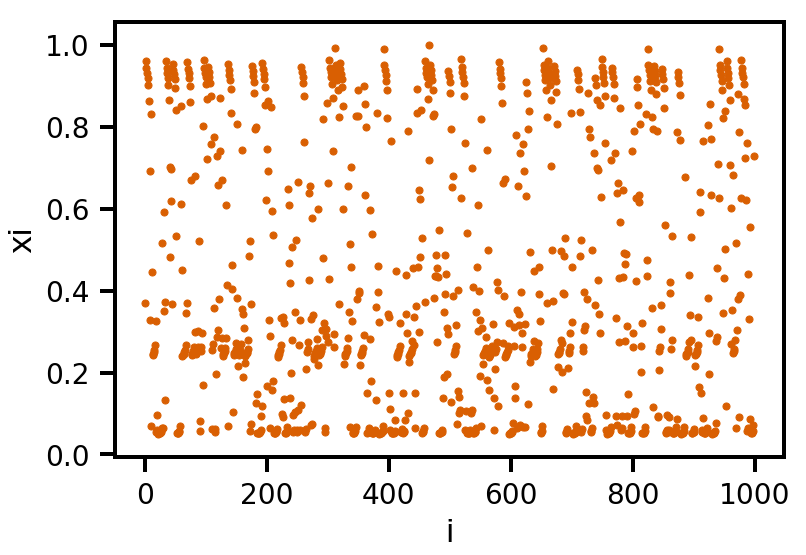

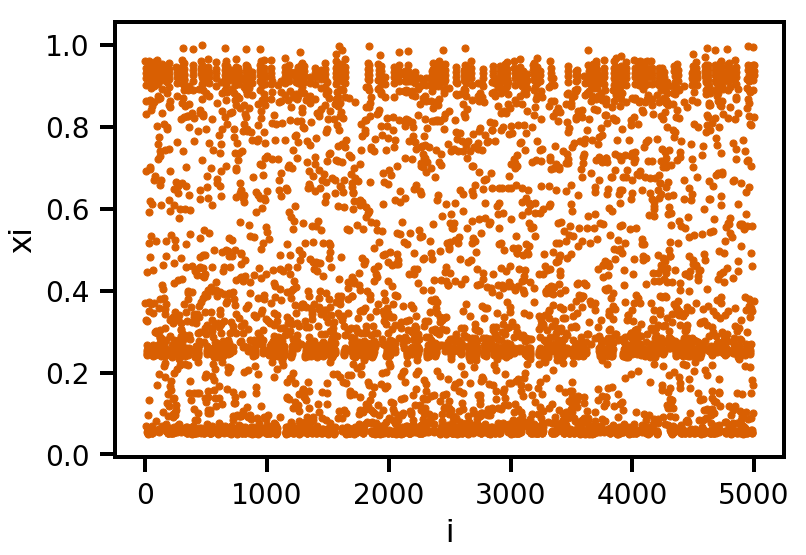

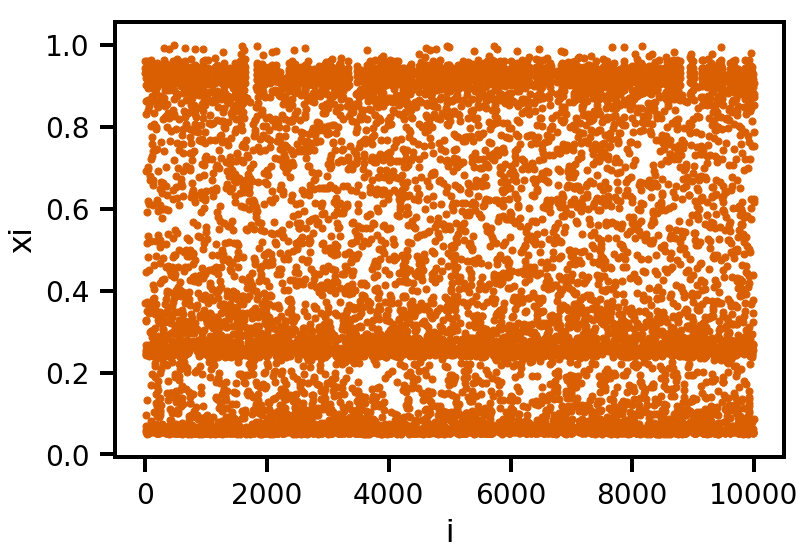

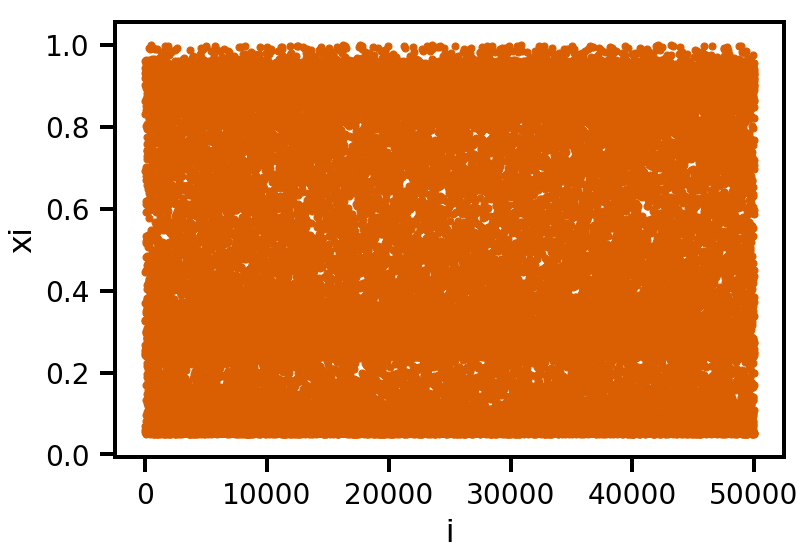

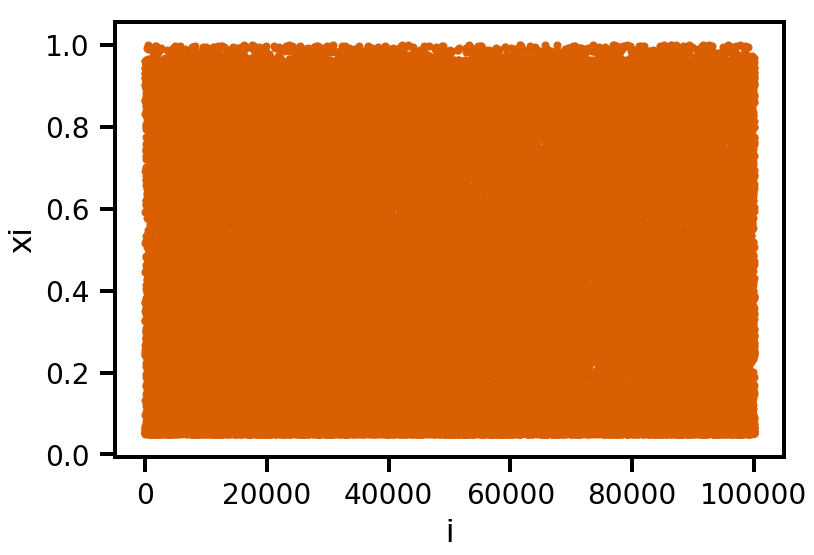

In [14]:
run_plot_test2(ueco,x0eco,"ecology")

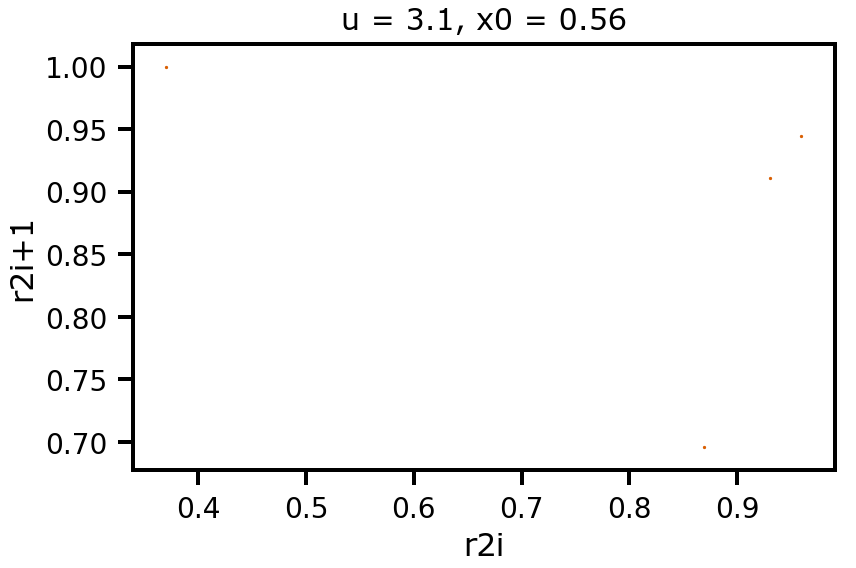

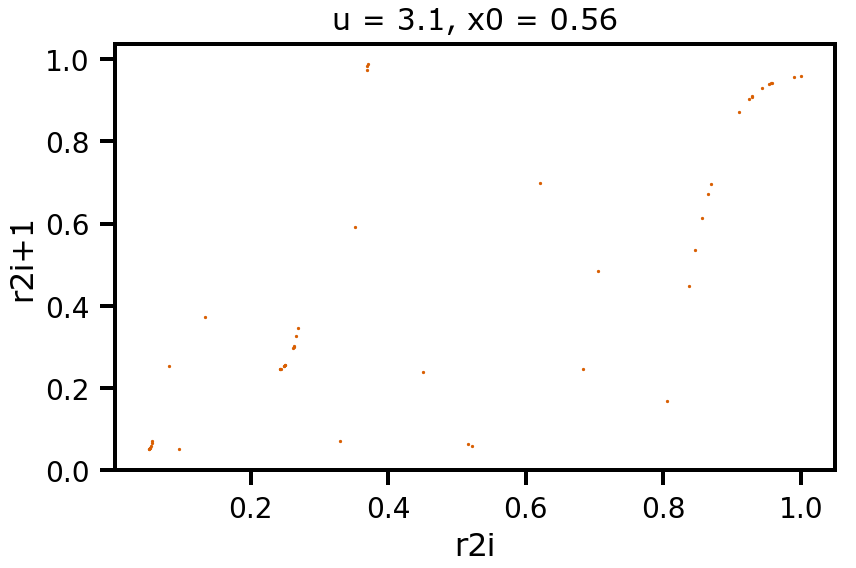

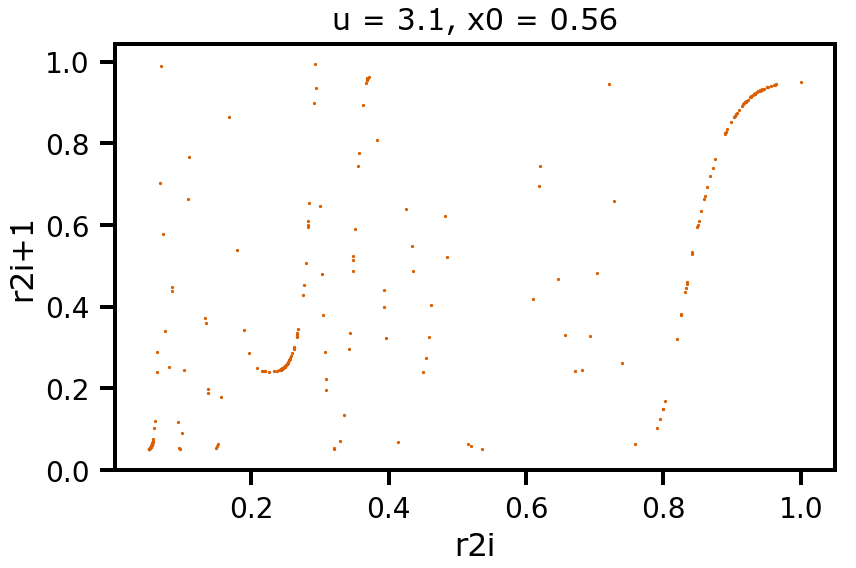

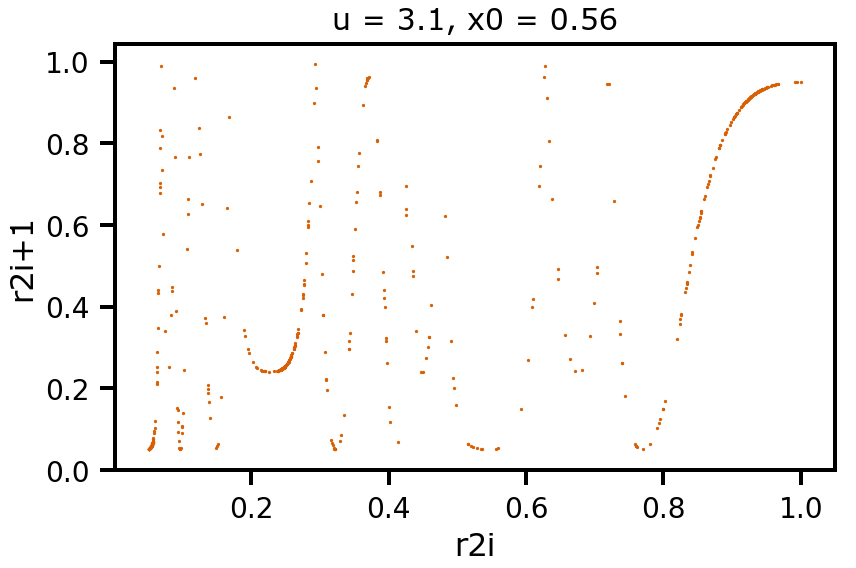

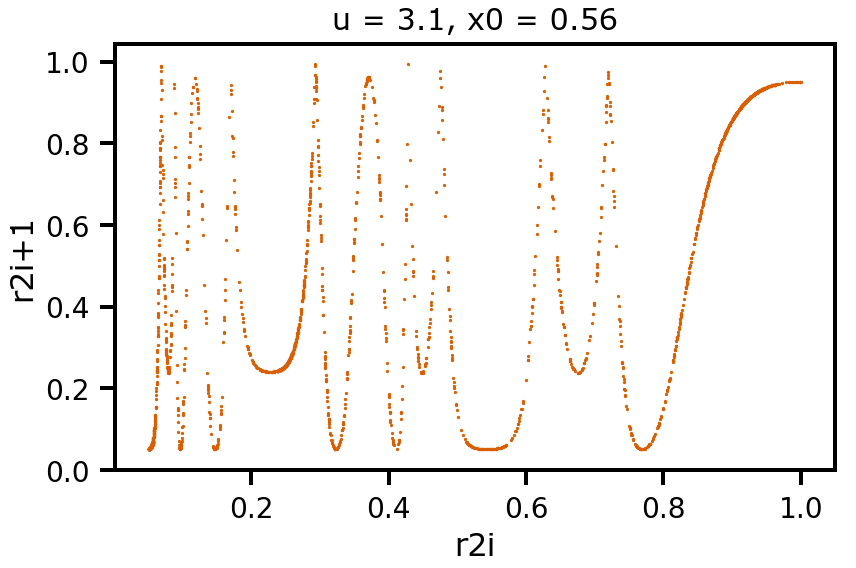

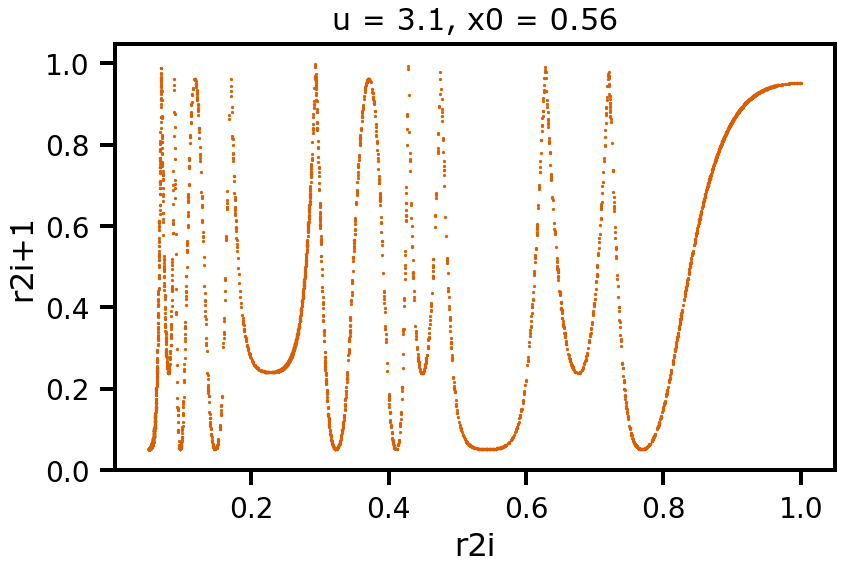

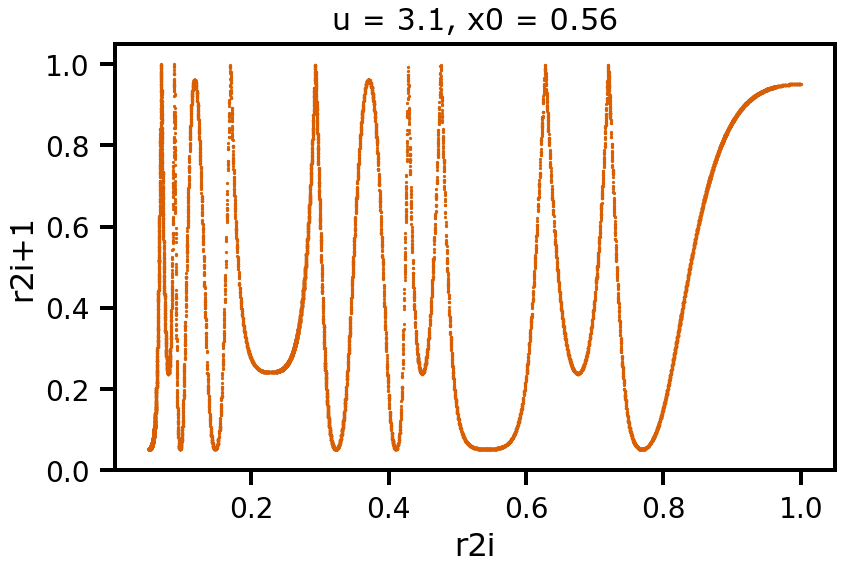

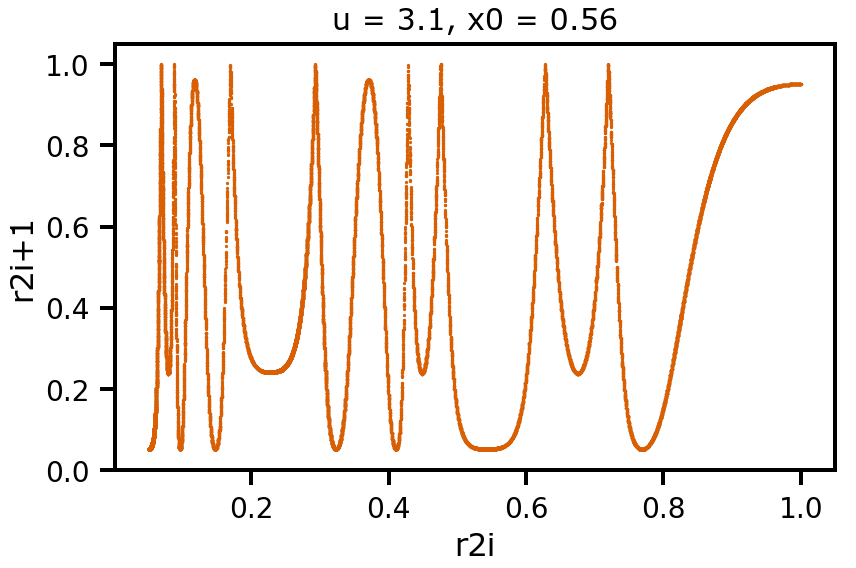

In [15]:
run_plot_test5(ueco,x0eco,"ecology")

## Test 3

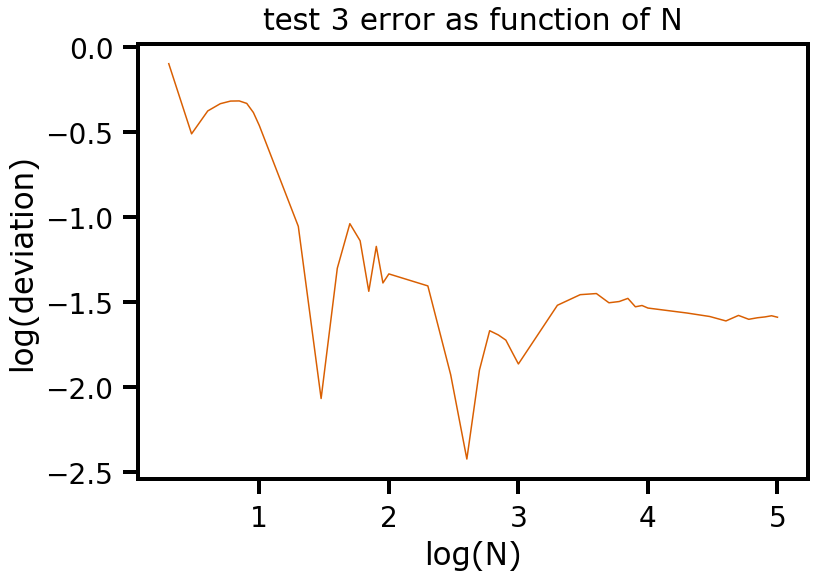

These should be close to  0.2
[1.         0.50939188 0.6218645  0.66535314 0.68214663 0.68311128
 0.66711048 0.61301715 0.54622368 0.28839537 0.19141579 0.25011246
 0.29165006 0.2727317  0.2366688  0.26735038 0.24105969 0.24641676
 0.23944858 0.18813675 0.1962174  0.18740678 0.17848956 0.17969406
 0.18106405 0.18405377 0.18629437 0.16965189 0.16496118 0.16442696
 0.1686064  0.16807017 0.16668643 0.170271   0.16974559 0.17077094
 0.1726709  0.17393208 0.17545424 0.17354547 0.1748994  0.17437455
 0.17407986 0.1736684  0.17418534]
this slope should be close to -.5 it is equal to  -0.26011860292399375


In [16]:
do_test3(ueco,x0eco,"ecology")

## Test 4

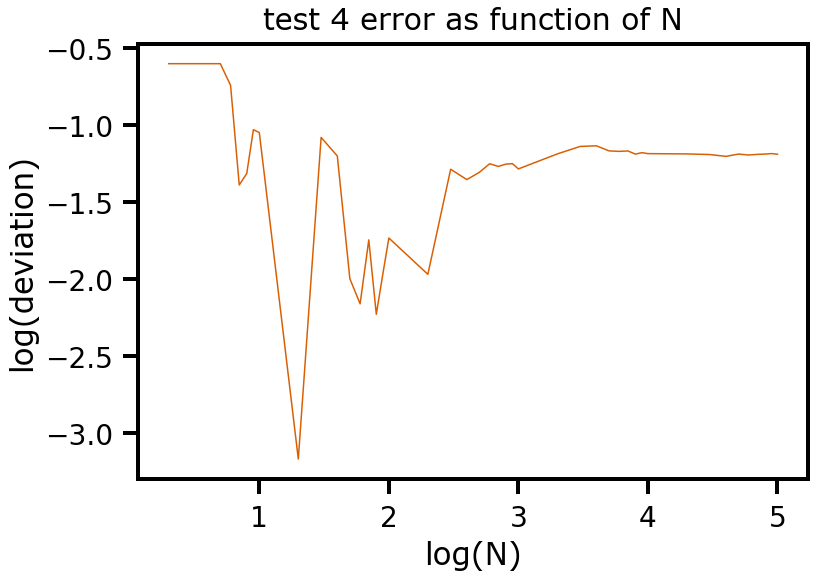

These should be close to  0.25
[0.         0.         0.         0.         0.06888783 0.20919386
 0.29844077 0.34328164 0.33926574 0.24932118 0.16697169 0.1870112
 0.26004933 0.25690464 0.23204165 0.25590508 0.23913753 0.23153162
 0.23926827 0.19838819 0.20579144 0.20068804 0.19396649 0.19617506
 0.19427649 0.19390868 0.1981255  0.18506876 0.17740487 0.17672528
 0.18208158 0.18260084 0.18214605 0.18527752 0.1838753  0.18481402
 0.18510003 0.18569073 0.18742812 0.18527506 0.1861328  0.18553683
 0.1852609  0.18477376 0.18539883]
this slope should be close to -.5 it is equal to  0.013855624844606555


In [17]:
do_test4(ueco,x0eco,"ecology")

## Test 6

In [18]:
do_test6(ueco,x0eco,"ecology")

0.32443213020050543  k =  1 N =  100
0.2732233397912309  k =  3 N =  100
0.62457843385752  k =  7 N =  100
2.5583891684674387  k =  1 N =  1000
test failed with k =  1 N =  1000 with a value of  2.5583891684674387
0.9309880935789526  k =  3 N =  1000
0.13216910185477526  k =  7 N =  1000
9.394187660115632  k =  1 N =  10000
test failed with k =  1 N =  10000 with a value of  9.394187660115632
4.478799973974004  k =  3 N =  10000
test failed with k =  3 N =  10000 with a value of  4.478799973974004
1.0095771352871041  k =  7 N =  10000
test failed with k =  7 N =  10000 with a value of  1.0095771352871041
29.224638527701572  k =  1 N =  100000
test failed with k =  1 N =  100000 with a value of  29.224638527701572
13.114544944166632  k =  3 N =  100000
test failed with k =  3 N =  100000 with a value of  13.114544944166632
2.2631074915177996  k =  7 N =  100000
test failed with k =  7 N =  100000 with a value of  2.2631074915177996

The test failed


array([ 0.32443213,  0.27322334,  0.62457843,  2.55838917,  0.93098809,
        0.1321691 ,  9.39418766,  4.47879997,  1.00957714, 29.22463853,
       13.11454494,  2.26310749])

The ecology random number generator did not perform well with the given parameters I found. Perhaps there are better parameters to use which cause the algorithm to be chaotic but I was unable to find one through my own methods or online. The plot tests show that the numbers generated are fairly random but do have noticable patterns so it is not a great random number generator. It seems like the generator produces relatively random numbers but has distinct patterns where random numbers tend to pile up. This map did especially poor in tests 3,4 and 6. Test 3 is not a disaster as the test values were relatively close to the expected and the deviation from the expected value goes as (N)^(-1/4) instead of (N)^(-1/2), so this test indicates the map produces somewhat uniform and random values. Test 4 shows different results as it deviates further from the expected summation values and shows a dependence on N not close to (N)^(-1/2). Test 6 fails for just about every combination. These tests indicate that the map is not producing random or uniform numbers, however judging from the graphs it seems like the map is producing relatively random numbers.

# Testing numpys rng

## Plot Tests

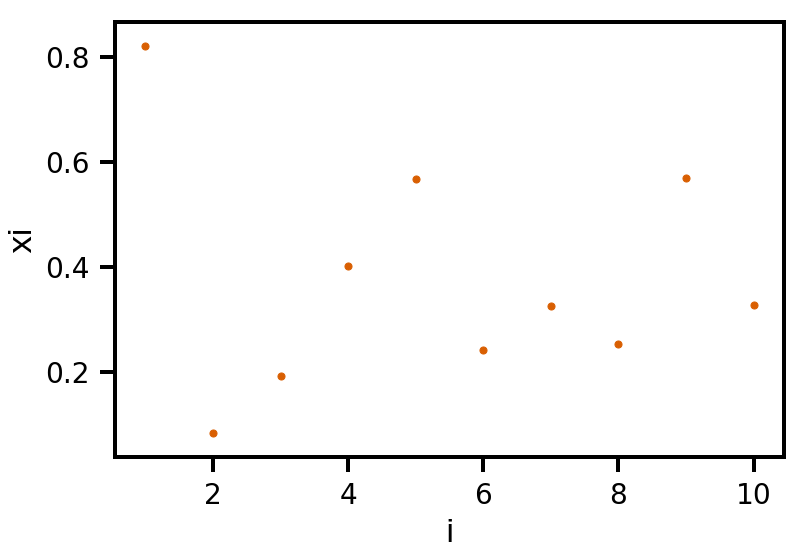

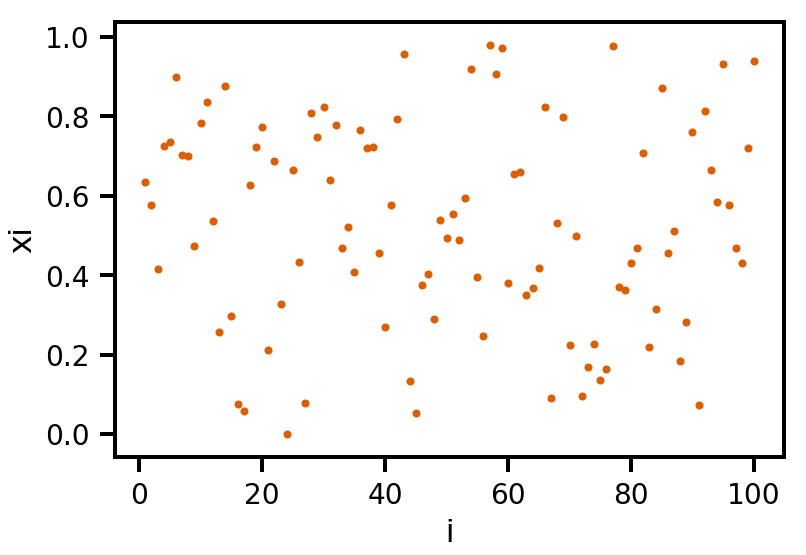

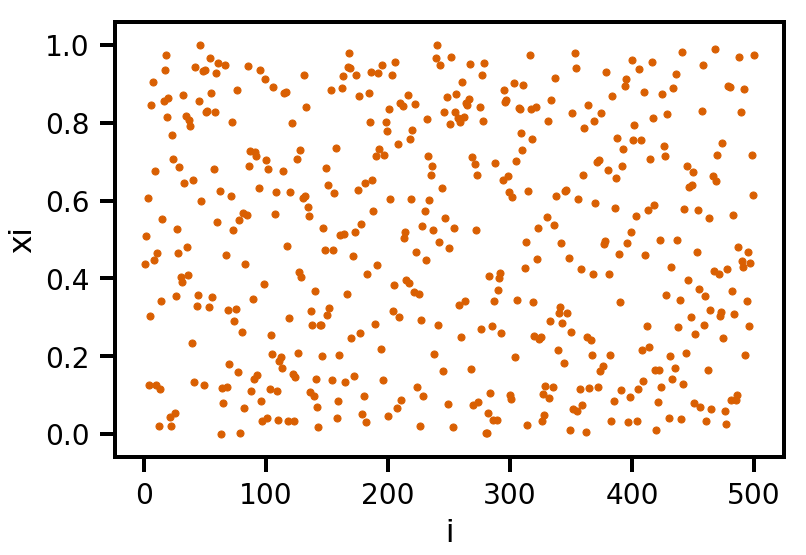

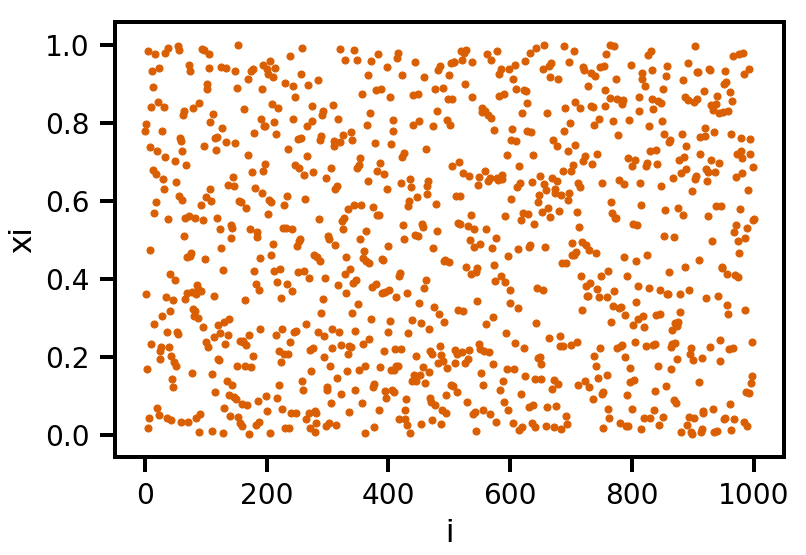

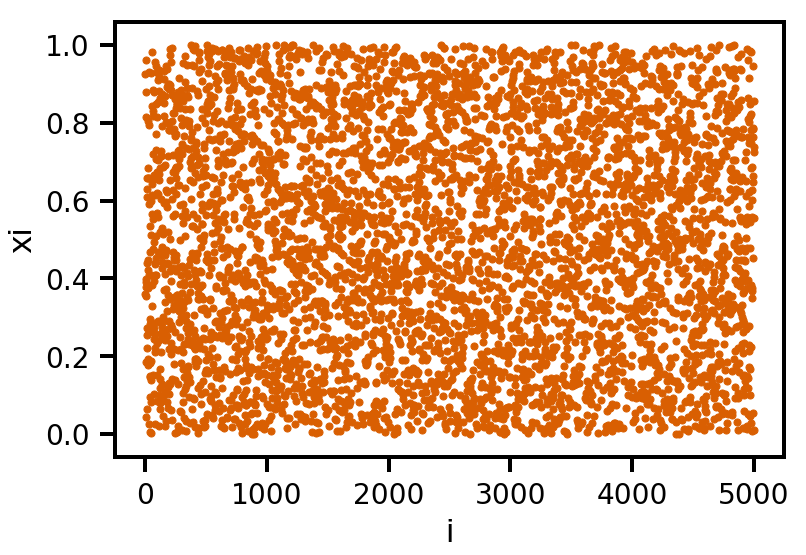

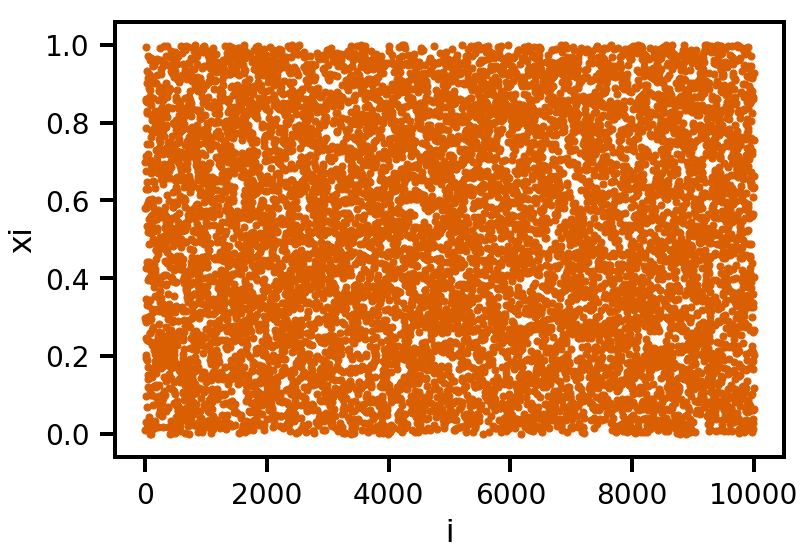

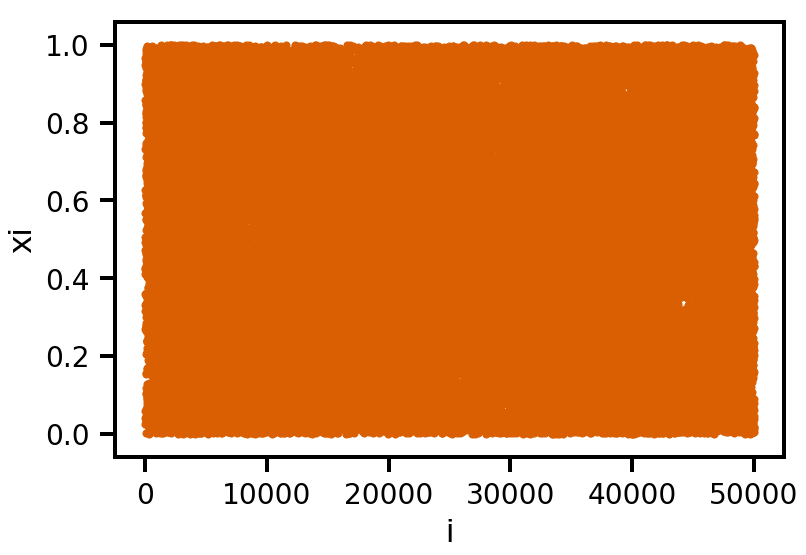

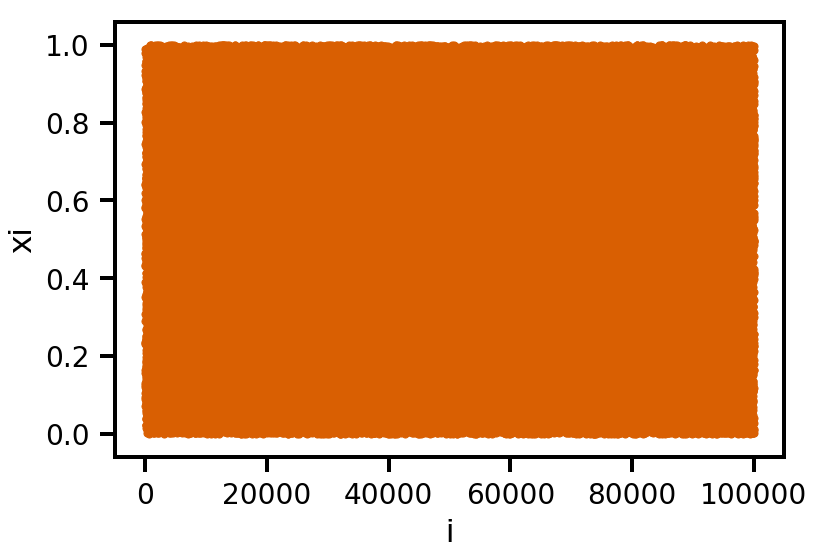

In [19]:
run_plot_test2(0,0,"numpy")

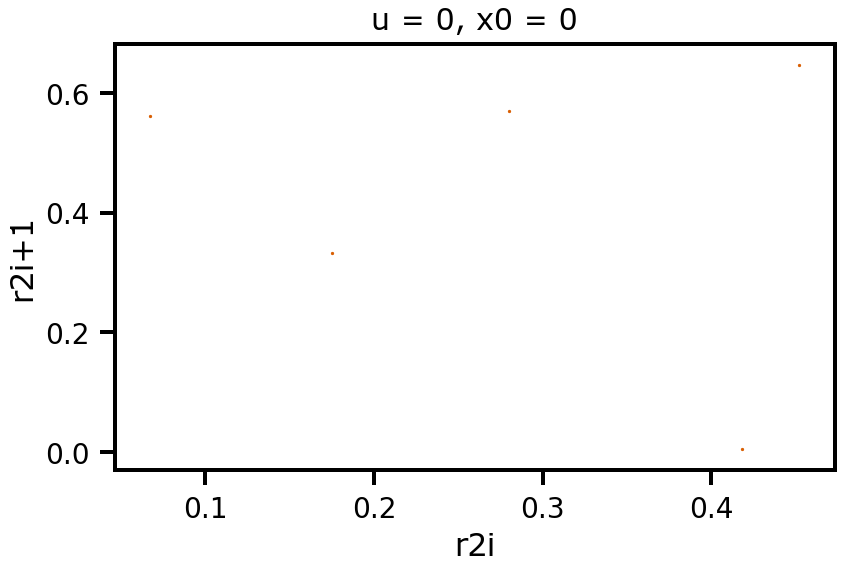

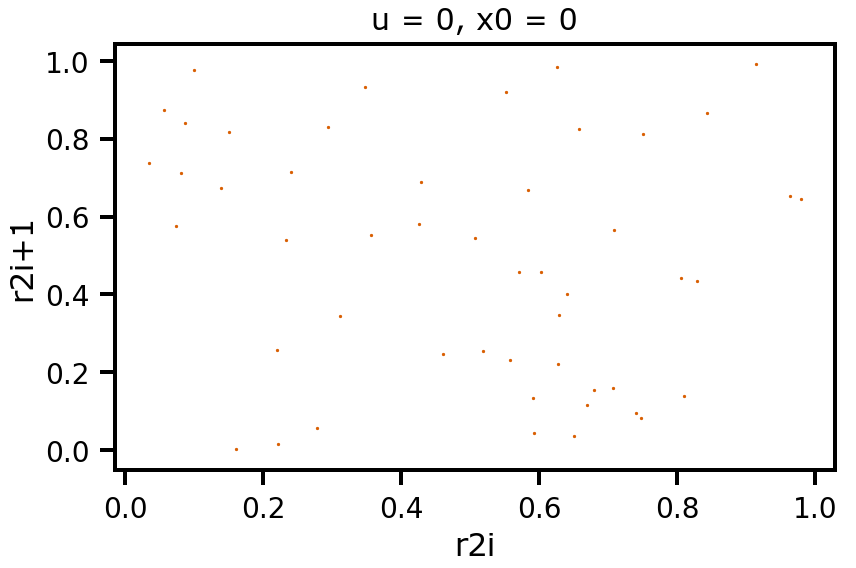

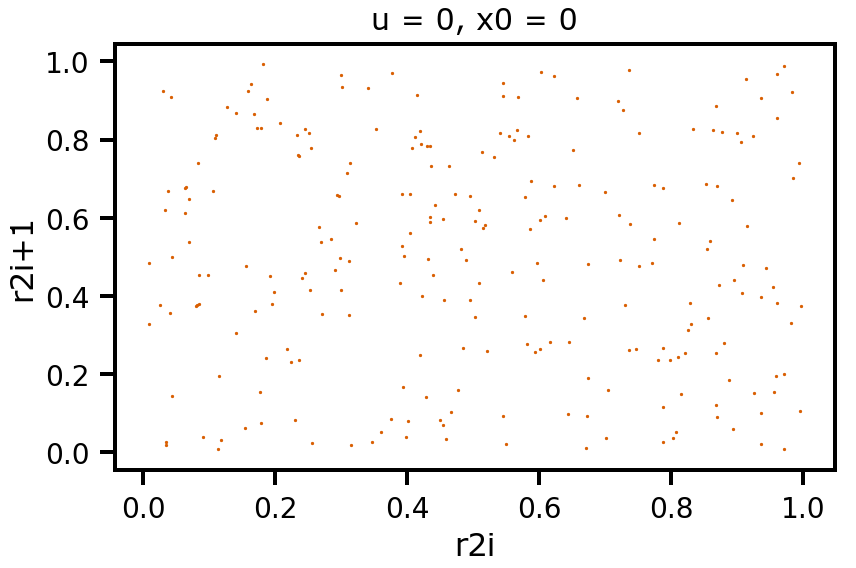

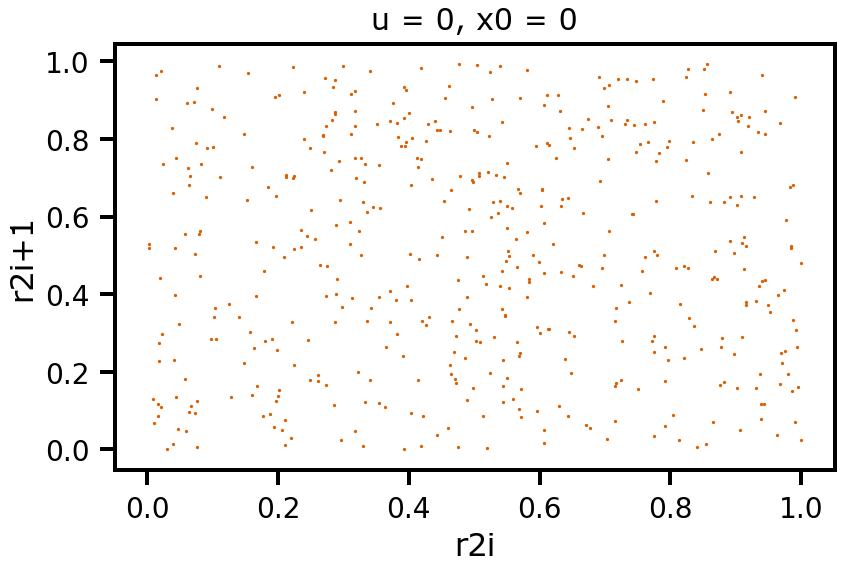

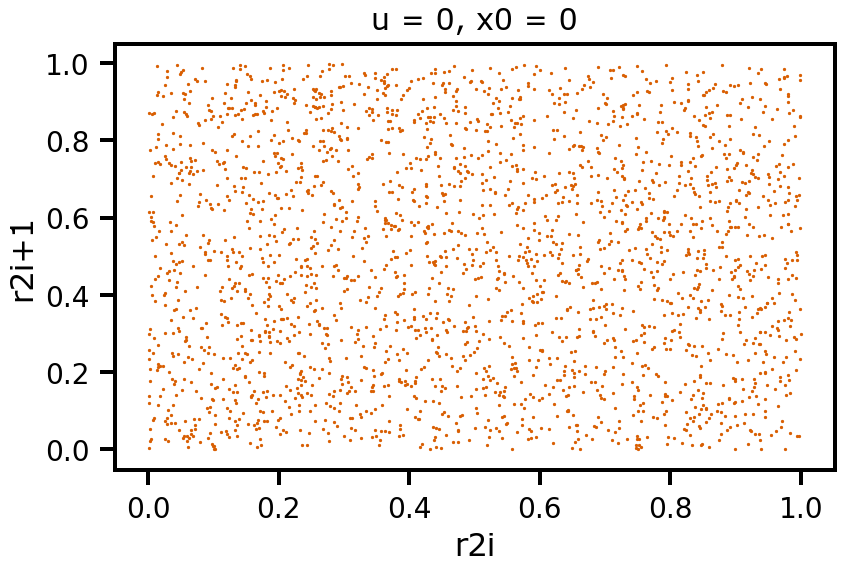

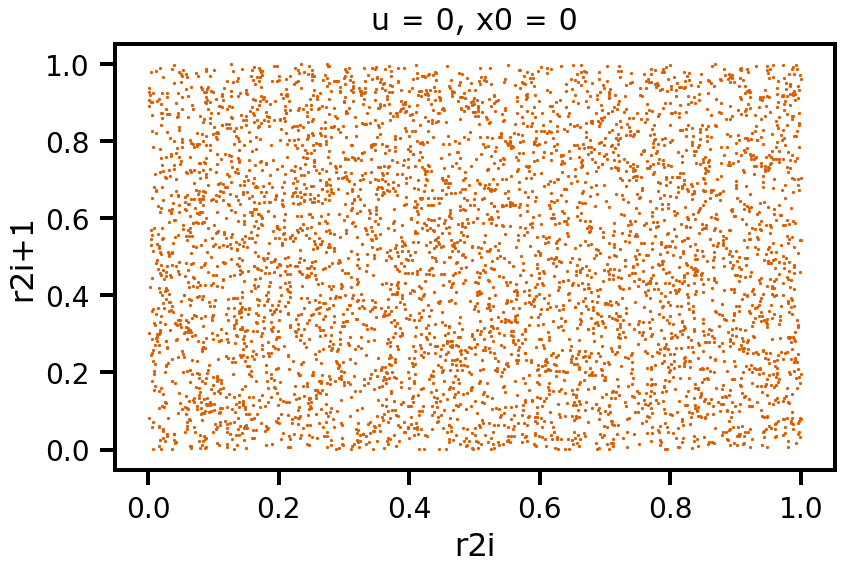

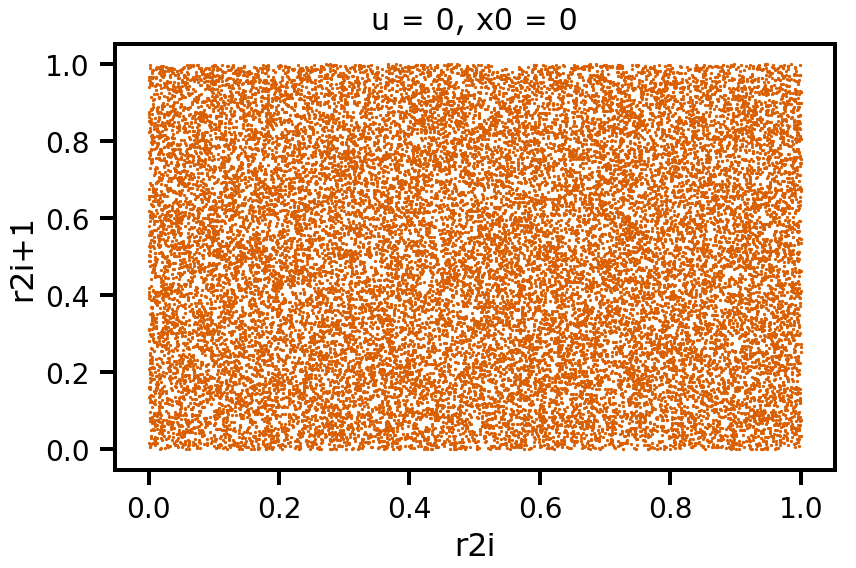

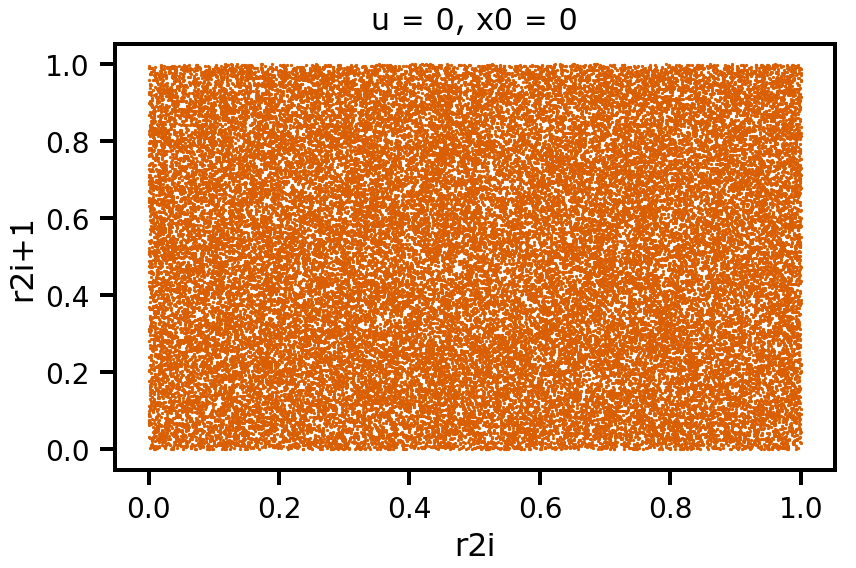

In [20]:
run_plot_test5(0,0,"numpy")

## Test 3

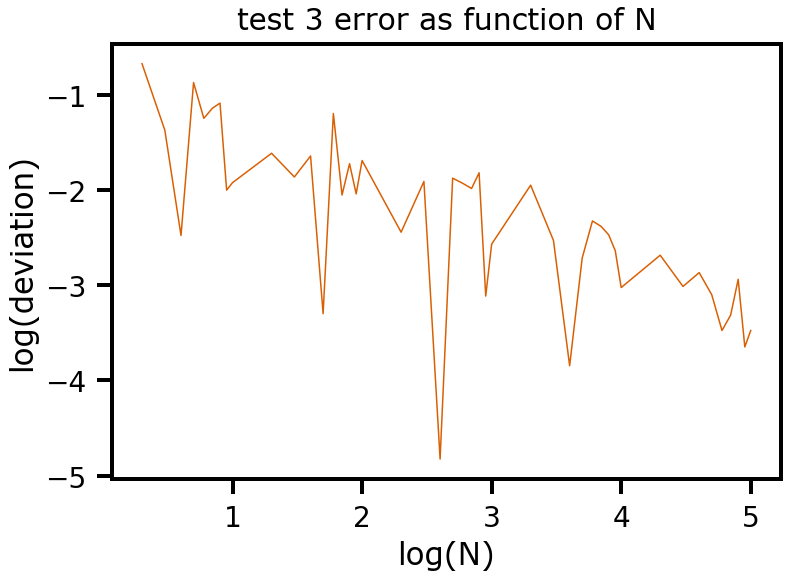

These should be close to  0.2
[0.41080826 0.15771001 0.20331906 0.06640753 0.14370307 0.1279934
 0.28131881 0.20993017 0.21189931 0.22418489 0.18635586 0.1773449
 0.20050112 0.26321645 0.19118188 0.21879688 0.20906688 0.22029518
 0.2035916  0.2122355  0.19998506 0.21326461 0.21166852 0.18967373
 0.18490725 0.19923286 0.19730934 0.21118504 0.19705483 0.19985762
 0.19807722 0.19528787 0.19586999 0.19662482 0.20229502 0.20094281
 0.19794167 0.19903214 0.20135292 0.20079189 0.19966661 0.1995148
 0.20115046 0.19977568 0.20033381]
this slope should be close to -.5 it is equal to  -0.4244705399797428


In [21]:
do_test3(0,0,"numpy")

## Test 4

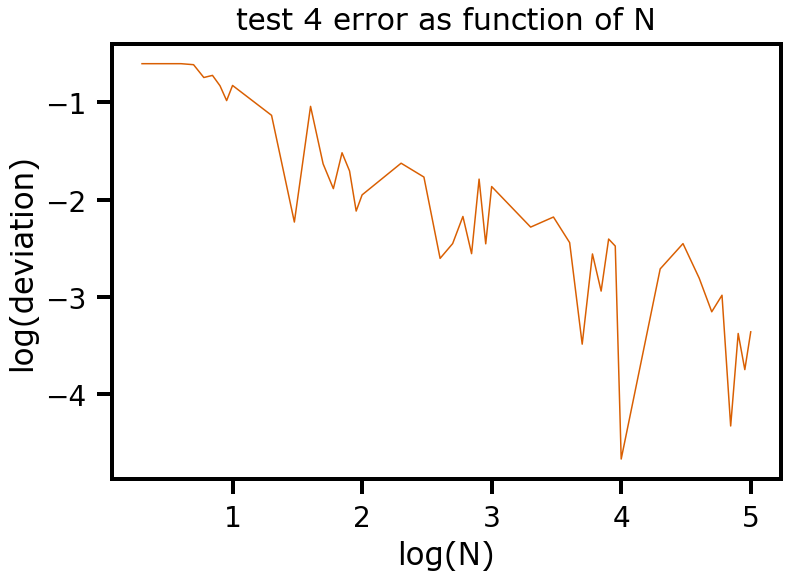

These should be close to  0.25
[0.         0.         0.         0.0058795  0.0697345  0.06046969
 0.10175744 0.1455847  0.10060078 0.17630915 0.24409663 0.34109982
 0.27339577 0.23699097 0.21958847 0.2697655  0.24234458 0.26122518
 0.273743   0.2671155  0.24750031 0.25354614 0.25673668 0.25279389
 0.23370044 0.24647321 0.23632702 0.24476137 0.24335268 0.24637054
 0.24967135 0.24722338 0.25115303 0.25394908 0.24665524 0.24997829
 0.25194878 0.25354471 0.25156651 0.25070674 0.24895453 0.24995256
 0.25042315 0.24982006 0.25043999]
this slope should be close to -.5 it is equal to  -0.6214817826222379


In [22]:
do_test4(0,0,"numpy")

## Test 6

In [23]:
do_test6(0,0,"numpy")

0.1425467614419551  k =  1 N =  100
0.38361036338103227  k =  3 N =  100
0.09786056340036792  k =  7 N =  100
0.17952012836946574  k =  1 N =  1000
0.0932840425364229  k =  3 N =  1000
0.1103407193264578  k =  7 N =  1000
0.0789188224391224  k =  1 N =  10000
0.1709903503519239  k =  3 N =  10000
0.38552841109874003  k =  7 N =  10000
0.29039973400662206  k =  1 N =  100000
0.10016690528386255  k =  3 N =  100000
0.33975198906116355  k =  7 N =  100000

The test passed


array([0.14254676, 0.38361036, 0.09786056, 0.17952013, 0.09328404,
       0.11034072, 0.07891882, 0.17099035, 0.38552841, 0.29039973,
       0.10016691, 0.33975199])

As expected numpy's random number generator performs very very well. This random generator is the standard in python and is likely very optimized so it performs much better than my other generators. It passed every test easily. The plot tests show no patterns indicating random number production without dependence on the previous random number. It also passes the analytical tests. Tests 3 and 4 give values close to the expected, and its deviations away from this expected value goes like (N)^(-1/2), indicating both random and uniform numbers. Numpy also passes test 6 with flying colors.

# Random numbers from timing

## Plot Tests

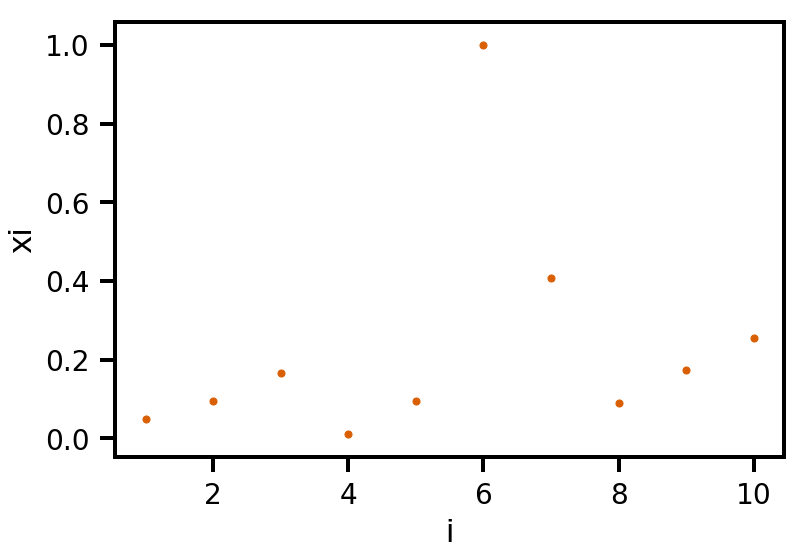

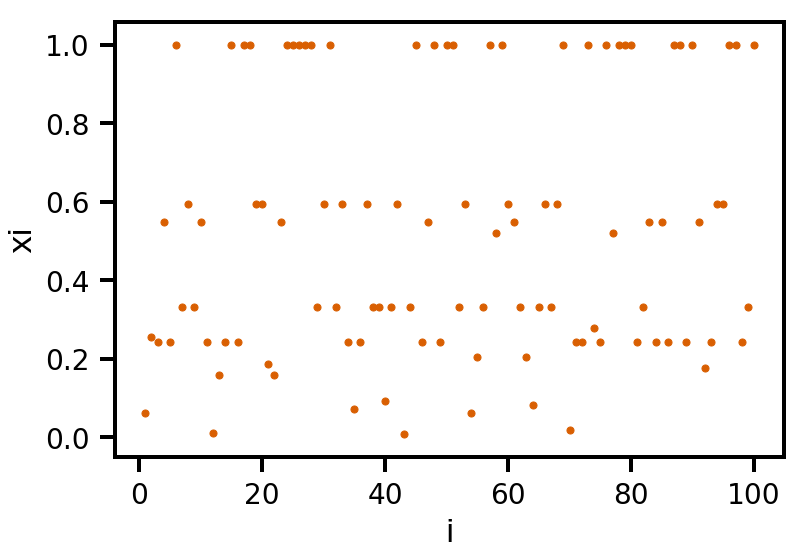

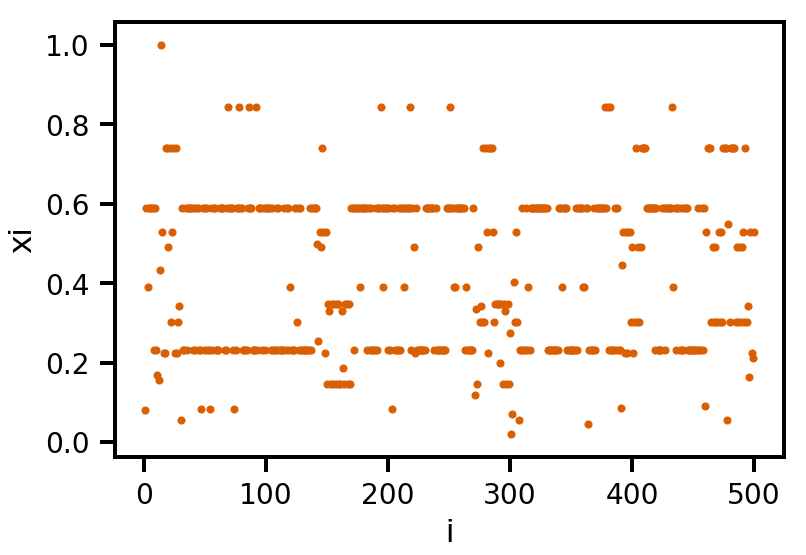

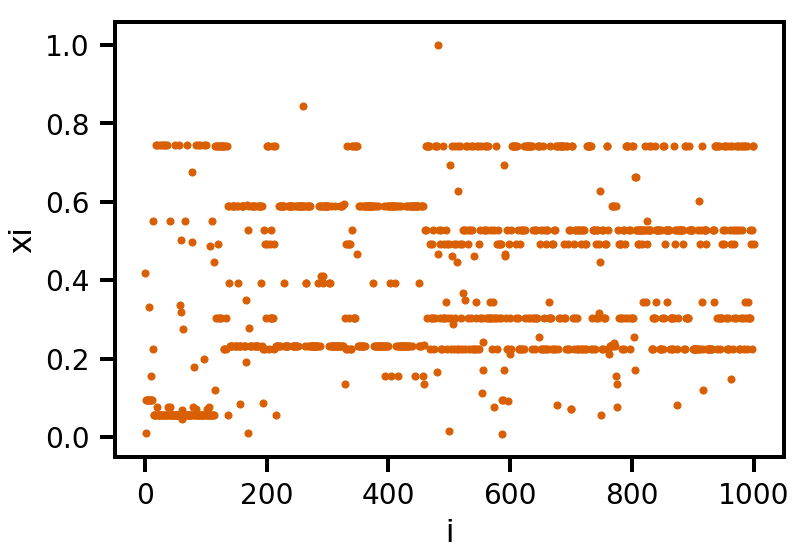

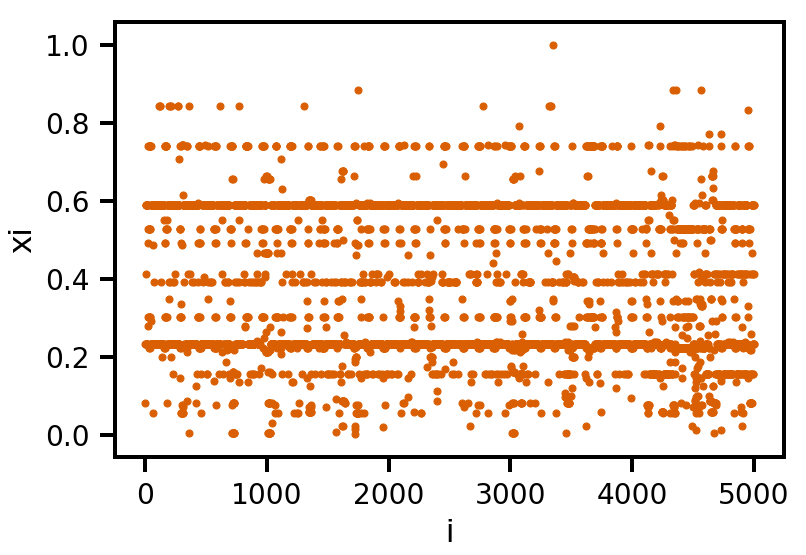

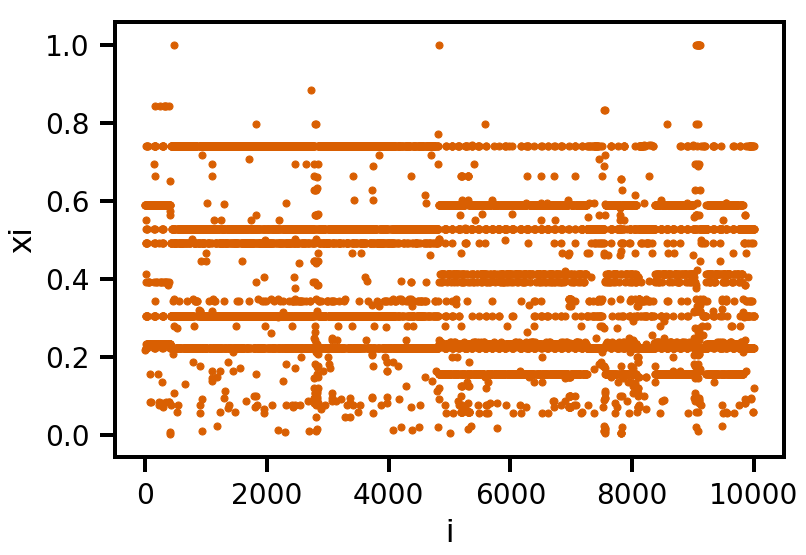

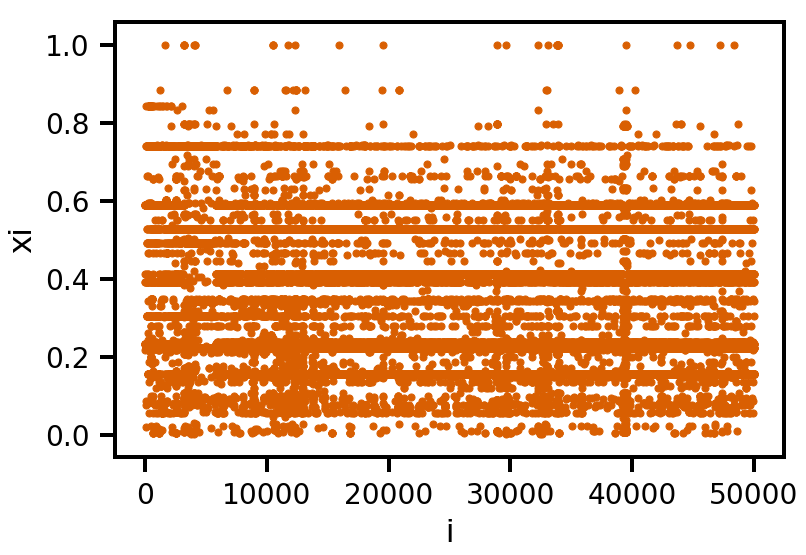

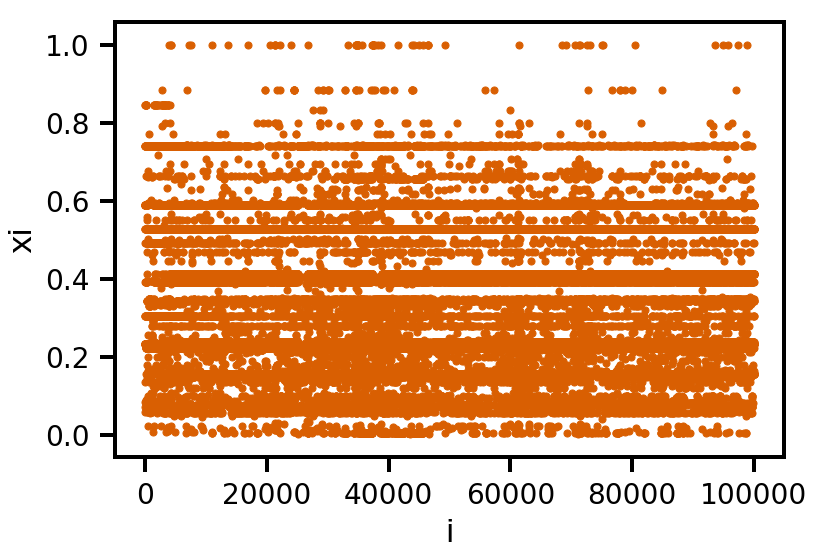

In [24]:
run_plot_test2(0,0,"time")

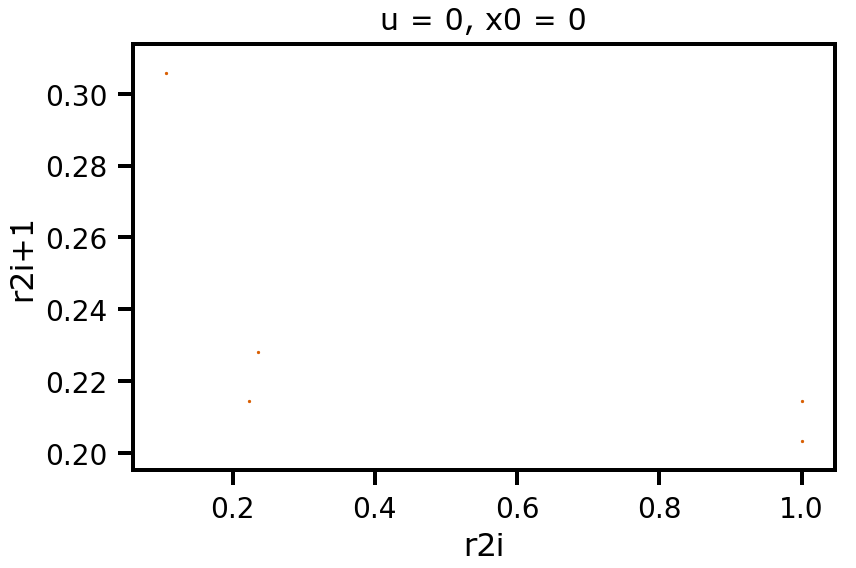

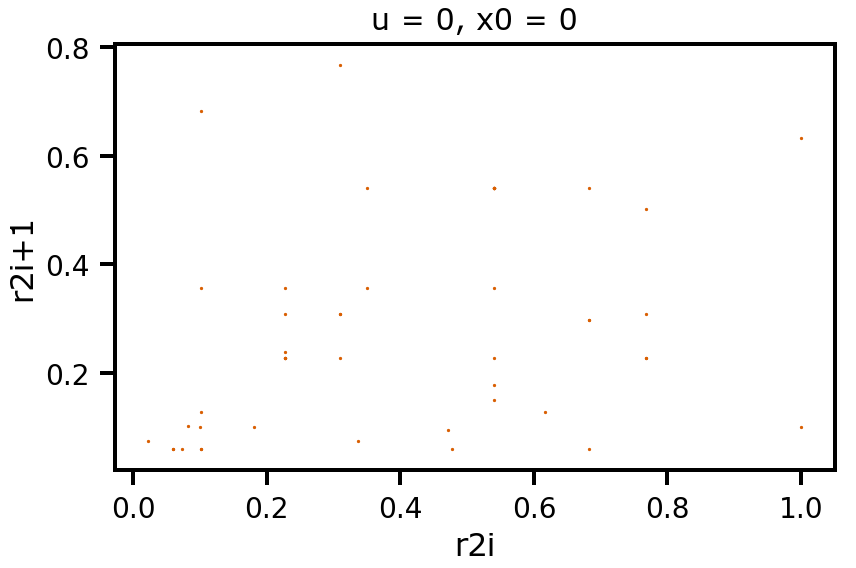

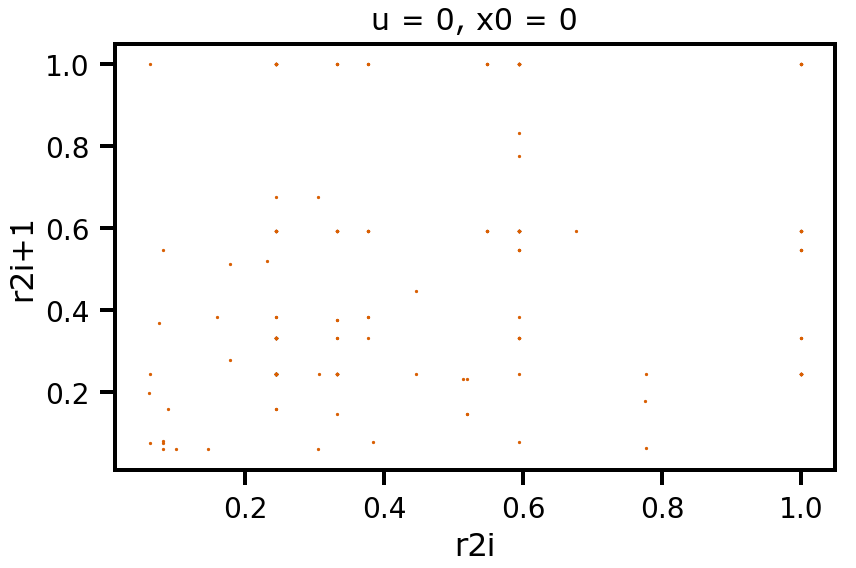

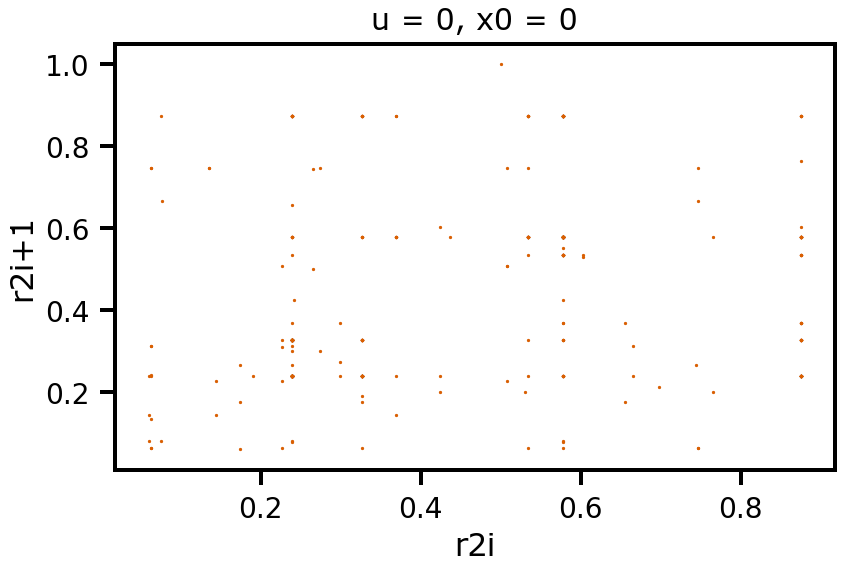

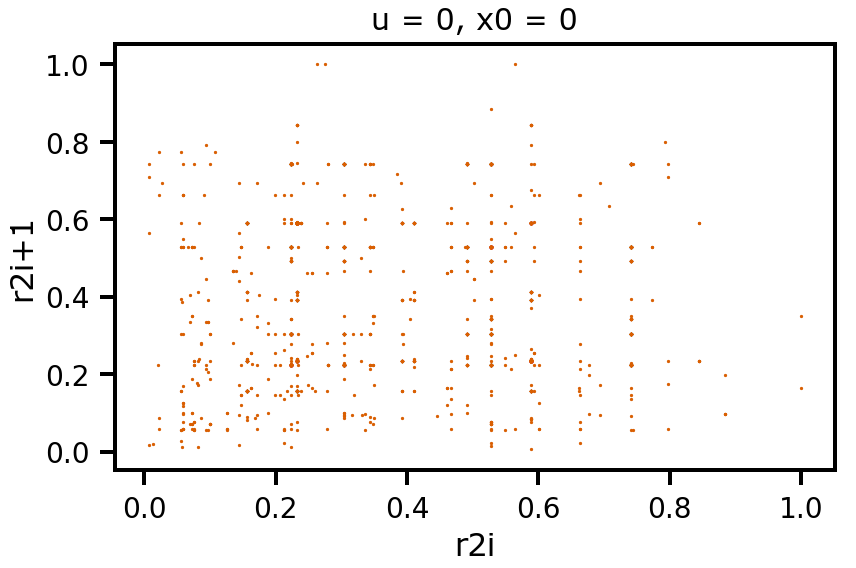

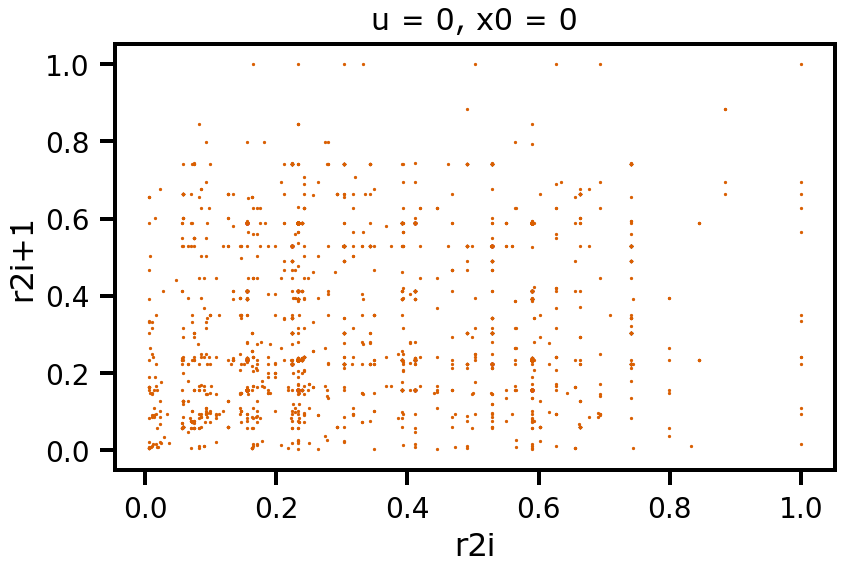

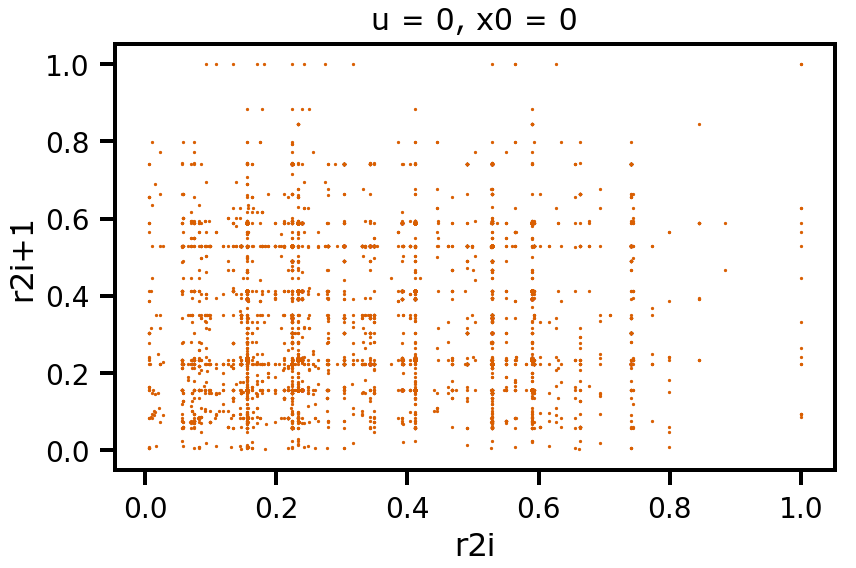

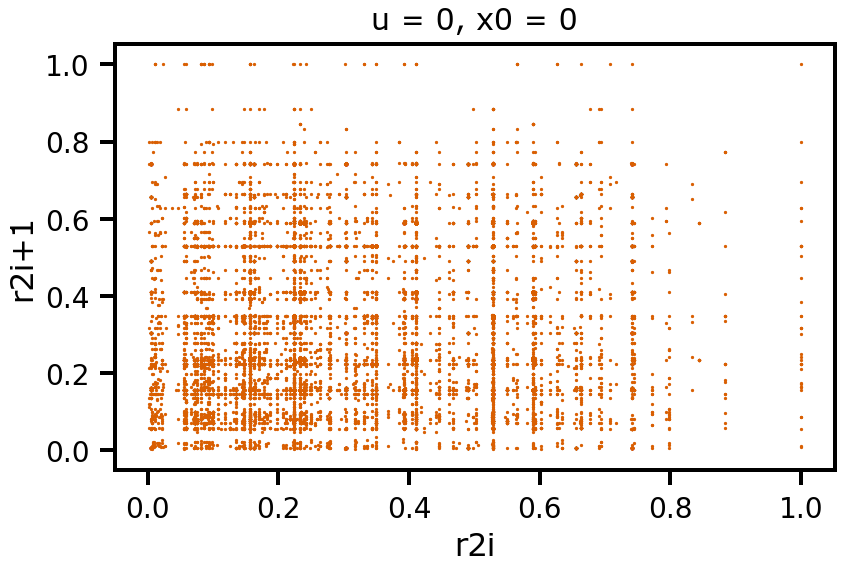

In [25]:
run_plot_test5(0,0,"time")

## Test 3

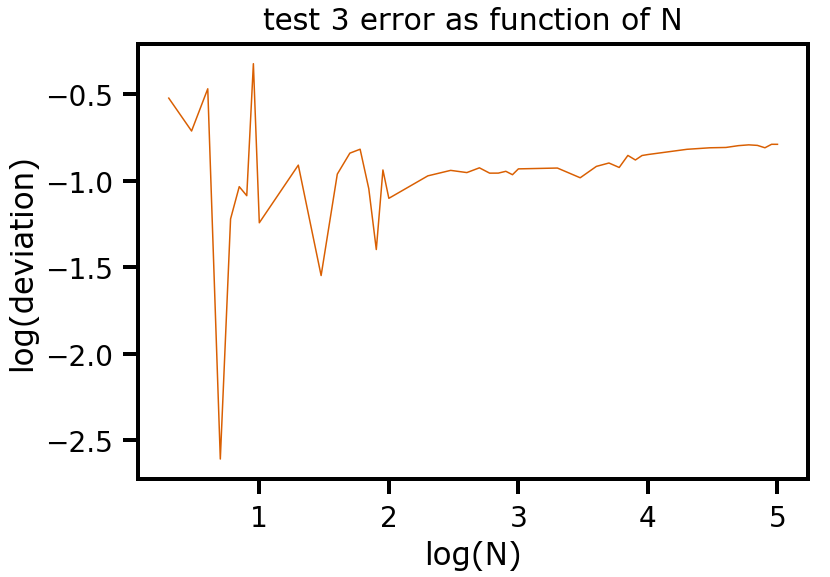

These should be close to  0.2
[0.50000002 0.39364993 0.53971836 0.20245881 0.26007985 0.29231052
 0.281871   0.67445167 0.14290871 0.07704022 0.17171908 0.09088029
 0.05579105 0.04806207 0.11013604 0.160017   0.08470292 0.12095056
 0.09339642 0.0853335  0.08864372 0.08138263 0.0894892  0.08943919
 0.0867443  0.09175195 0.0830169  0.08172168 0.09608459 0.0790836
 0.0735225  0.08081099 0.06009404 0.06831399 0.06026183 0.05842825
 0.04822044 0.04512376 0.04443512 0.04062301 0.03894265 0.04008975
 0.04507735 0.03774299 0.03778318]
this slope should be close to -.5 it is equal to  0.05815305073304773


In [26]:
do_test3(0,0,"time")

## Test 4

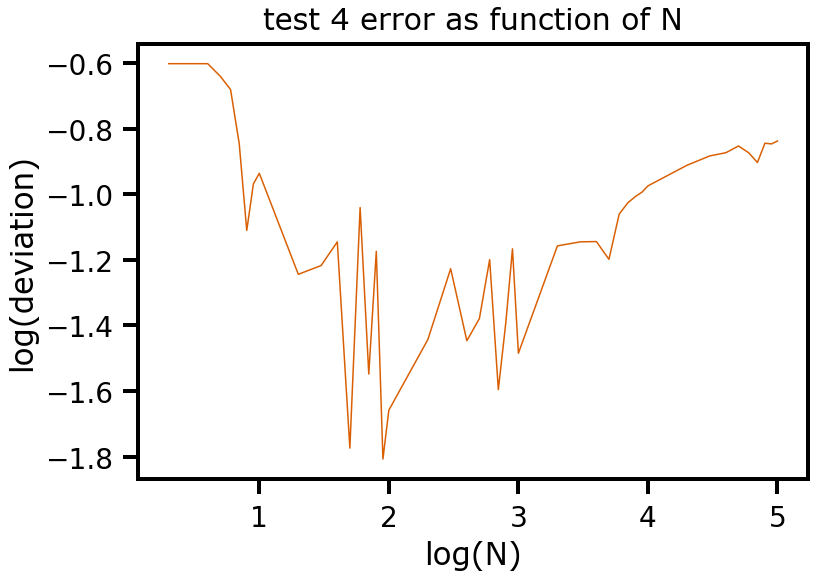

These should be close to  0.25
[0.         0.         0.         0.0211745  0.04153446 0.1074887
 0.17246044 0.1424934  0.13420708 0.1930083  0.31059954 0.17843153
 0.23317943 0.15891666 0.22170462 0.18303279 0.23441879 0.22804207
 0.21395154 0.19073889 0.21424459 0.20821996 0.18680596 0.22464058
 0.20933061 0.18185681 0.21725425 0.18043196 0.17842628 0.1782758
 0.18668199 0.16300372 0.15582711 0.15162961 0.1485037  0.1439753
 0.12747939 0.11918012 0.11615501 0.10971973 0.11624779 0.12507924
 0.10696674 0.10766437 0.10472097]
this slope should be close to -.5 it is equal to  0.009115939776171601


In [27]:
do_test4(0,0,"time")

## Test 6

In [28]:
do_test6(0,0,"time")

0.9549821995010432  k =  1 N =  100
0.5148409403240123  k =  3 N =  100
0.6885369391033085  k =  7 N =  100
1.8492518114512335  k =  1 N =  1000
test failed with k =  1 N =  1000 with a value of  1.8492518114512335
4.062991754191415  k =  3 N =  1000
test failed with k =  3 N =  1000 with a value of  4.062991754191415
2.8506029142017  k =  7 N =  1000
test failed with k =  7 N =  1000 with a value of  2.8506029142017
12.638865934472971  k =  1 N =  10000
test failed with k =  1 N =  10000 with a value of  12.638865934472971
15.482887729826553  k =  3 N =  10000
test failed with k =  3 N =  10000 with a value of  15.482887729826553
10.79666477459162  k =  7 N =  10000
test failed with k =  7 N =  10000 with a value of  10.79666477459162
58.23031255233315  k =  1 N =  100000
test failed with k =  1 N =  100000 with a value of  58.23031255233315
57.362425825562205  k =  3 N =  100000
test failed with k =  3 N =  100000 with a value of  57.362425825562205
37.363211939459646  k =  7 N =  10

array([ 0.9549822 ,  0.51484094,  0.68853694,  1.84925181,  4.06299175,
        2.85060291, 12.63886593, 15.48288773, 10.79666477, 58.23031255,
       57.36242583, 37.36321194])

This random number generator performed quite poorly. The plot tests show some amount of randomness, as the random numbers fill most of the plot in plot test 2 but clearly have some patterns where random numbers tend to pile up. Plot test 5 shows that my random numbers tend to skew towards the bottom left and shows very noticable patterns. The analytical tests were all a disaster as the calculated summation values are not close to the expected and their deviations do not go as (N)^(-1/2). These tests all show that this random generator is not good and that the random numbers are neither uniform nor random. This generator might be fine for some low level applications but I surely would not want to use it for a professional project. This generator is likely not the best because the computer seems to have patterns in the way it times. In my generator I am timing 100 additions and 100 multiplications which you would expect would give random time values each time but there seems to be some sort of regularity in how the computer times these operations, indicated by the patterns we see.

## Conclusion

In this project I tested 4 different random number generators, 2 came from iterative maps, one I made myself using python's time function, and the other is just numpys uniform random number generator. I made use of both qualitative and quantitative tests to determine the effectiveness of these random number generators. In our qualitative tests I looked for patterns in my graphps indicating non-randomness and in the qualitative tests I ran summations and compared them against the expected values. Two of these generators were completely successful and the other two were not. Numpy and the logistic map performed very well while my created random number generator and the ecology map did not perform well. The created random number generator likely failed due to regularity in how the computer does its timing, and the ecology map failed likely due to the parameters we used. 